# Forest Cover Data Exploration

**The purpose of this project is to:**  

1. Explore a dataset regarding the features of forest areas.  
2. Prepare the training data for use in predictive classification.

**You are given a training set with 15,120 observations, including features and cover type.  
The test set has 565,892 observations**

# Process
1. Explore and seek to understand the data through visualizations and key metrics.

## Setup

In [1]:
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import packages
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/forest-cover-type-prediction/train.csv.zip
/kaggle/input/forest-cover-type-prediction/sampleSubmission.csv
/kaggle/input/forest-cover-type-prediction/sampleSubmission.csv.zip
/kaggle/input/forest-cover-type-prediction/test3.csv
/kaggle/input/forest-cover-type-prediction/train.csv
/kaggle/input/forest-cover-type-prediction/test.csv
/kaggle/input/forest-cover-type-prediction/test.csv.zip


In [3]:
#import data
training = pd.read_csv('/kaggle/input/forest-cover-type-prediction/train.csv')
test = pd.read_csv('/kaggle/input/forest-cover-type-prediction/test.csv')

In [4]:
#Look at training data - 56 populated columns
training.head(10)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
5,6,2579,132,6,300,-15,67,230,237,140,...,0,0,0,0,0,0,0,0,0,2
6,7,2606,45,7,270,5,633,222,225,138,...,0,0,0,0,0,0,0,0,0,5
7,8,2605,49,4,234,7,573,222,230,144,...,0,0,0,0,0,0,0,0,0,5
8,9,2617,45,9,240,56,666,223,221,133,...,0,0,0,0,0,0,0,0,0,5
9,10,2612,59,10,247,11,636,228,219,124,...,0,0,0,0,0,0,0,0,0,5


In [5]:
#Look at test data - 55 populated columns since there is no 'Cover_Type' column
test.head(10)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0
5,15126,2699,21,18,30,3,2890,206,200,127,...,0,0,0,0,0,0,0,0,0,0
6,15127,2699,15,17,30,6,2860,202,202,133,...,0,0,0,0,0,0,0,0,0,0
7,15128,2696,10,16,30,6,2830,202,207,140,...,0,0,0,0,0,0,0,0,0,0
8,15129,2696,17,13,30,6,2770,208,211,138,...,0,0,0,0,0,0,0,0,0,0
9,15130,2693,14,15,30,7,2741,205,209,138,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#add new column to training named train_test - it will be populated with 1s
training['train_test']= 1

#Drop the first column 'Id' since it just has serial numbers. Not useful in the prediction process.
training = training.iloc[:,1:]

training.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,train_test
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,5,1
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,5,1
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,2,1
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,2,1
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,5,1
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,2,1
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,5,1
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,5,1
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,5,1
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,5,1


In [7]:
#add new column to test named train_test - it will be populated with 0s
test['train_test']=0

#Drop the first column 'Id' since it just has serial numbers. Not useful in the prediction process.
test = test.iloc[:,1:]

#add new column to test named Cover_Type - it will be populated with NaNs since that is what we are trying to determine
test['Cover_Type']=np.NaN

test.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,train_test,Cover_Type
0,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,NaN
1,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,NaN
2,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,NaN
3,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,NaN
4,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,NaN
5,2699,21,18,30,3,2890,206,200,127,6434,...,0,0,0,0,0,0,0,0,0,NaN
6,2699,15,17,30,6,2860,202,202,133,6464,...,0,0,0,0,0,0,0,0,0,NaN
7,2696,10,16,30,6,2830,202,207,140,6494,...,0,0,0,0,0,0,0,0,0,NaN
8,2696,17,13,30,6,2770,208,211,138,6553,...,0,0,0,0,0,0,0,0,0,NaN
9,2693,14,15,30,7,2741,205,209,138,6583,...,0,0,0,0,0,0,0,0,0,NaN


In [8]:
training.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,train_test
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000,1.0
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066,0.0
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.0
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.0
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.0
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.0


In [9]:
test.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,train_test,Cover_Type
count,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,...,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.0,0.0
mean,2964.977407,155.629558,14.039635,270.556622,46.294408,2367.143116,212.131133,223.435026,142.726951,1992.826227,...,0.078704,0.002808,0.003161,0.000193,0.000467,0.026233,0.023236,0.014651,0.0,NaN
std,273.157030,111.962120,7.450155,212.500153,58.209469,1561.482002,26.661063,19.668053,38.030094,1327.396895,...,0.269277,0.052916,0.056137,0.013877,0.021594,0.159827,0.150652,0.120152,0.0,NaN
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN
25%,2818.000000,58.000000,9.000000,108.000000,7.000000,1116.000000,198.000000,213.000000,119.000000,1034.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN
50%,2999.000000,127.000000,13.000000,228.000000,29.000000,2018.000000,218.000000,226.000000,143.000000,1723.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN
75%,3164.000000,260.000000,18.000000,390.000000,69.000000,3349.000000,231.000000,237.000000,168.000000,2561.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,NaN


In [10]:
#concatenate the two data sets into one set
all_data = pd.concat([training,test])
all_data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,train_test
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,5.0,1
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,5.0,1
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,2.0,1
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,2.0,1
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565887,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,NaN,0
565888,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,NaN,0
565889,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,NaN,0
565890,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,NaN,0


In [11]:
all_data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,train_test
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,15120.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,4.000000,0.026024
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,2.000066,0.159205
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000


In [12]:
#Drop the train_test column now that all_data has been set up
test = test.iloc[:,:-1]
training = training.iloc[:,:-1]

In [13]:
# %matplotlib inline embeds a static image of what we are trying to show in our notebook
#.columns shows the columns we are using
%matplotlib inline
all_data.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

## Project Planning

1. Understand nature of data with .info() and .describe()  

2. Histograms and boxplots (For numericals)  

3. Value counts (For categoricals)  

4. Missing data (How are we going to remove or impute (substitute in for) these missing values)  

5. Correlation between the metrics   

6. Explore interesting themes, such as   

    a. Is Elevation the primary driver of cover type?  
    
    b. Can certain cover types only grow in certain soil types?   
        
  
7. Feature engineerings  

8. Preprocess data together or use a transformer?  

    a. Use label for train and test  
    
9. Scaling?

10. Model baseline  
11. Tuned Model  
12. Ensemble Approaches  
13. Convert to CSV and submit

## Light Data Exploration

In [14]:
# For Numeric data, explore by:
    # Making histograms to understand distributions
    # Corrplot
    # Pivot table comparing surival rate across numeric variables
    
# For Categorical data
    # Make bar charts to understand balance of classes
    # Make pivot tables to understand relationship with survival

In [15]:
# .info() prints a summary of our data types and the non-null counts
# no nulls to handle
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

In [16]:
# no nulls to handle
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565892 entries, 0 to 565891
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           565892 non-null  int64
 1   Aspect                              565892 non-null  int64
 2   Slope                               565892 non-null  int64
 3   Horizontal_Distance_To_Hydrology    565892 non-null  int64
 4   Vertical_Distance_To_Hydrology      565892 non-null  int64
 5   Horizontal_Distance_To_Roadways     565892 non-null  int64
 6   Hillshade_9am                       565892 non-null  int64
 7   Hillshade_Noon                      565892 non-null  int64
 8   Hillshade_3pm                       565892 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  565892 non-null  int64
 10  Wilderness_Area1                    565892 non-null  int64
 11  Wilderness_Area2                    565892 non-null 

In [17]:
# .describe() shows us the measures of central tendency for our data
#Help us think about the data differntly and help us make associations
training.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [18]:
# look at numeric values separately 
df_num = training [['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways', 
                    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points']]

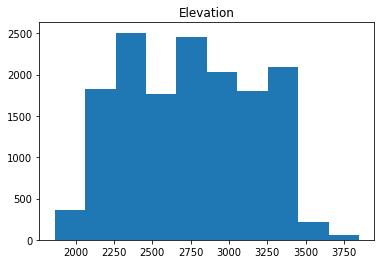

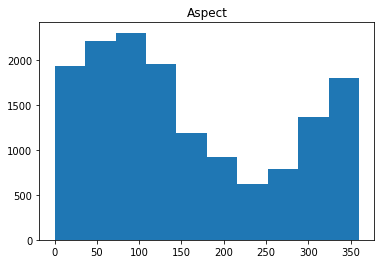

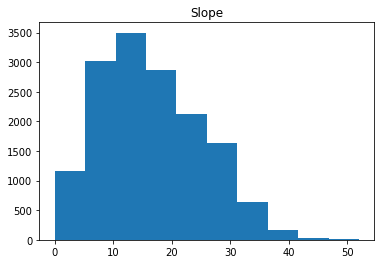

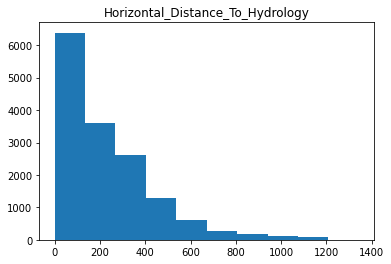

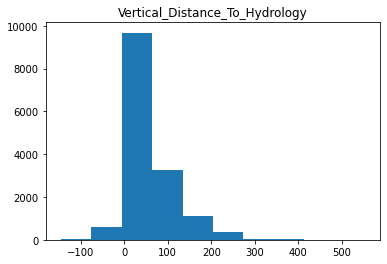

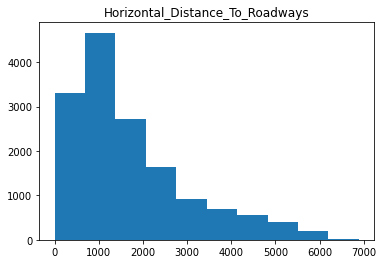

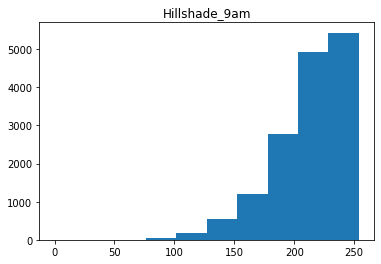

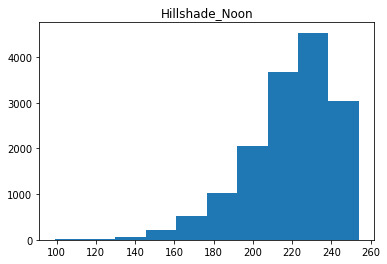

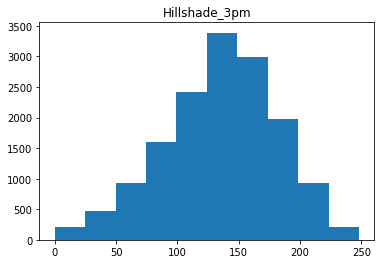

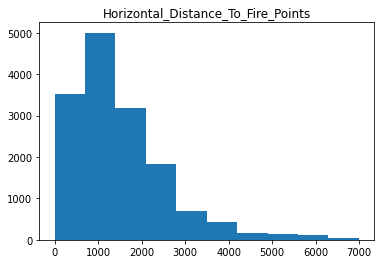

In [19]:
# for loop runs through all of the numeric variables and displays histograms for them all

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [20]:
# Prints a correlation matrix that shows how variables correlate with each other.
print(df_num.corr())

                                    Elevation    Aspect     Slope  \
Elevation                            1.000000 -0.011096 -0.312640   
Aspect                              -0.011096  1.000000  0.028148   
Slope                               -0.312640  0.028148  1.000000   
Horizontal_Distance_To_Hydrology     0.412712  0.040732 -0.055976   
Vertical_Distance_To_Hydrology       0.122092  0.056412  0.265314   
Horizontal_Distance_To_Roadways      0.578659  0.066184 -0.277049   
Hillshade_9am                        0.097900 -0.593997 -0.200072   
Hillshade_Noon                       0.215782  0.324912 -0.612613   
Hillshade_3pm                        0.089518  0.635022 -0.326887   
Horizontal_Distance_To_Fire_Points   0.443563 -0.052169 -0.239527   

                                    Horizontal_Distance_To_Hydrology  \
Elevation                                                   0.412712   
Aspect                                                      0.040732   
Slope                   

<AxesSubplot:>

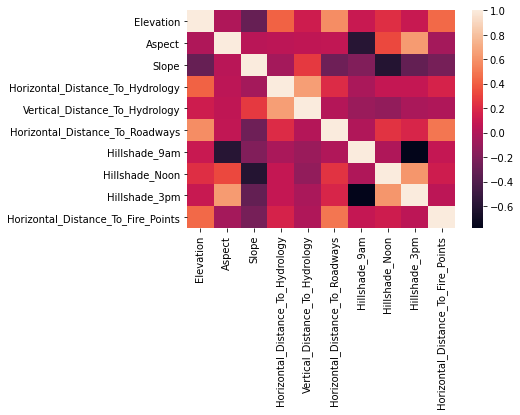

In [21]:
# Print a heatmap representation of the above correlation matrix
sns.heatmap(df_num.corr())

**Interpretation of degrees of correlation:**

Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).

High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.

Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.

Low degree: When the value lies below + .29, then it is said to be a small correlation.

No correlation: When the value is zero.

In [22]:
#Get the average numerical attributes of the cover types
pd.pivot_table(training, index = 'Cover_Type', values = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways',
                                                         'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points'])

,Aspect,Elevation,Hillshade_3pm,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Slope,Vertical_Distance_To_Hydrology
Cover_Type,,,,,,,,,,
1,159.463426,3128.025926,144.065741,211.690278,223.248611,1994.412963,271.507407,2579.715741,13.112963,41.281481
2,151.097222,2922.540278,142.950926,214.044444,225.369907,2155.277315,287.728704,2425.791667,13.423611,47.337963
3,173.672685,2398.423148,141.549537,201.655556,216.561111,916.909722,210.723148,969.595833,20.628704,64.081944
4,138.099537,2223.420370,111.808796,227.968056,216.889815,860.540741,104.537500,915.100463,18.468519,40.143519
5,137.992130,2786.801389,121.392593,223.368981,218.317130,1530.388889,208.873148,1329.318519,16.724537,50.871296
6,180.617130,2423.276852,147.682407,193.562963,209.960648,1057.654167,160.095370,1064.980556,18.986111,44.873611
7,155.794444,3362.769907,136.193981,216.639815,222.412037,2062.847222,346.904630,2713.659722,14.166667,68.945833


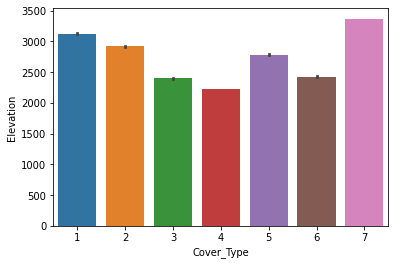

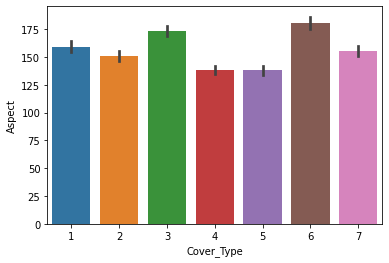

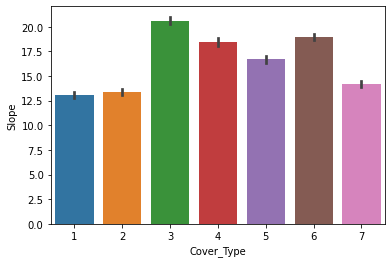

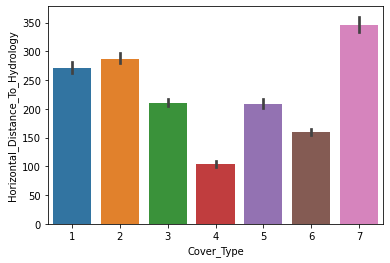

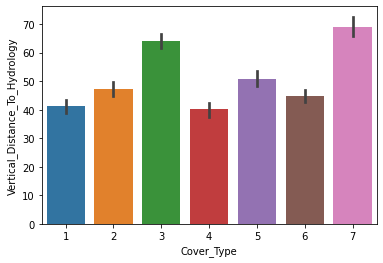

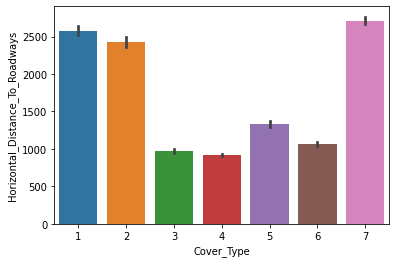

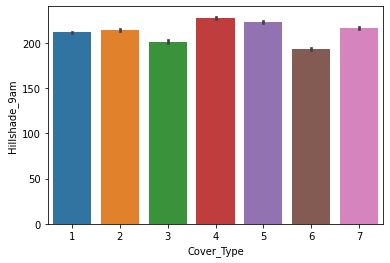

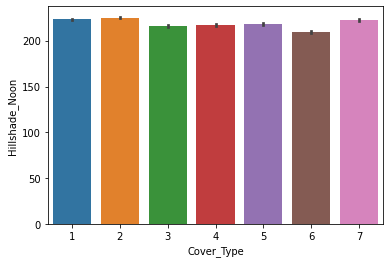

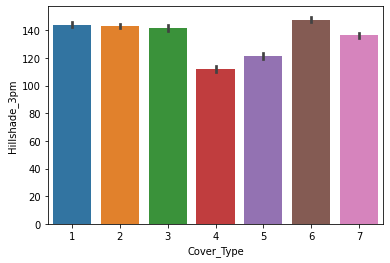

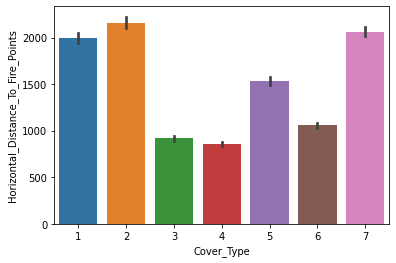

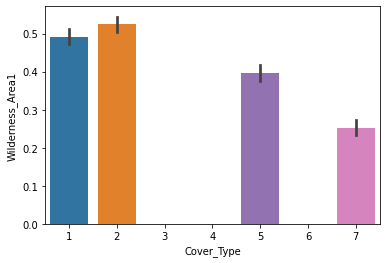

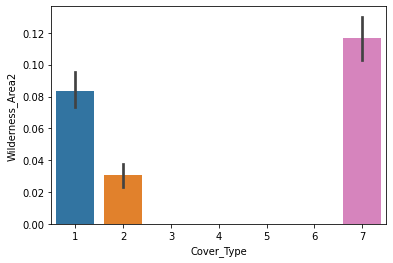

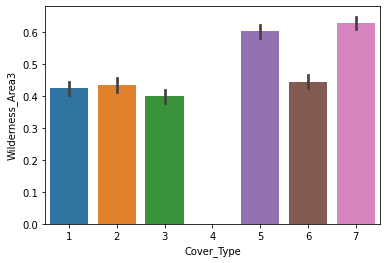

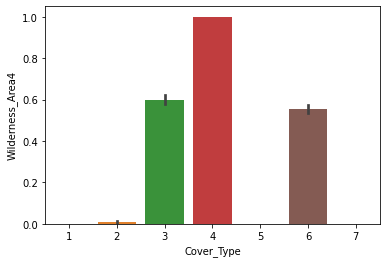

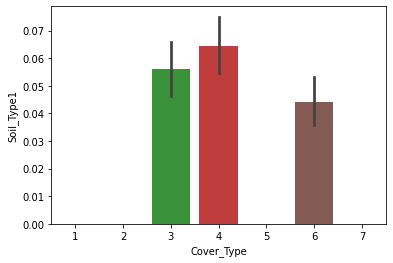

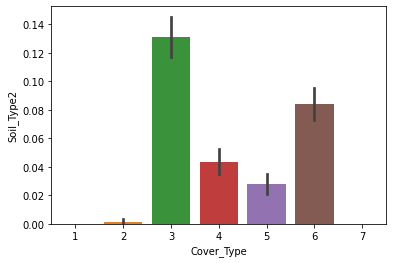

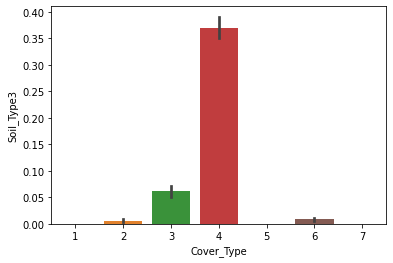

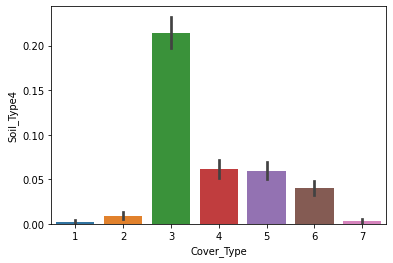

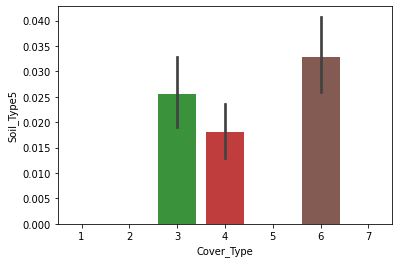

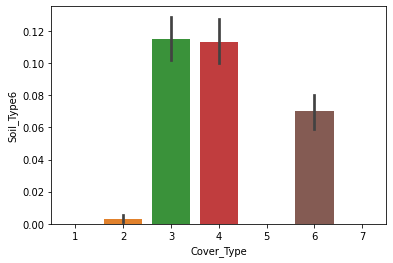

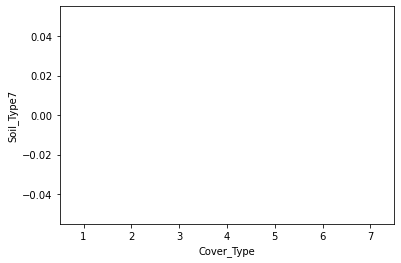

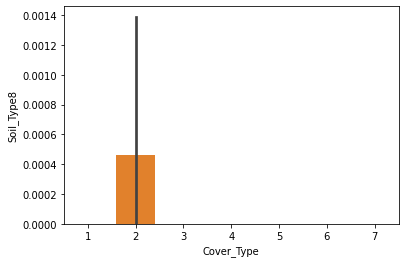

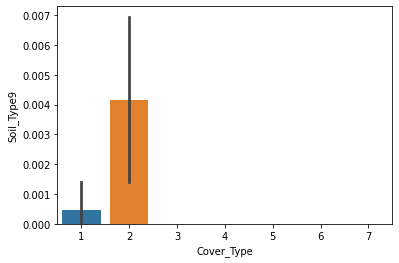

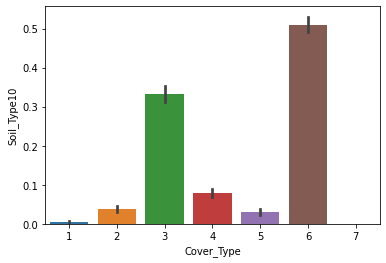

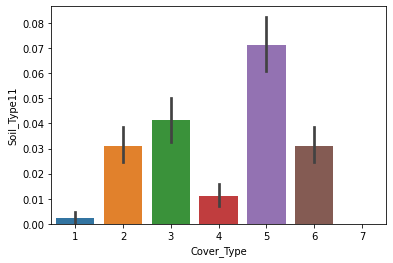

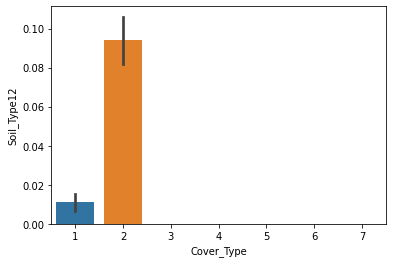

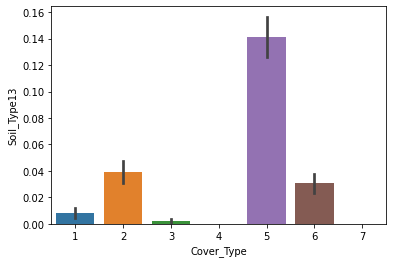

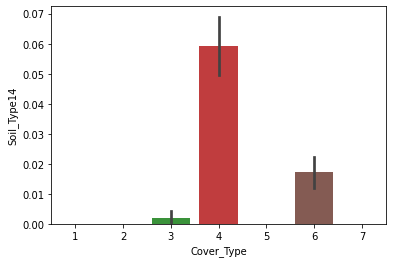

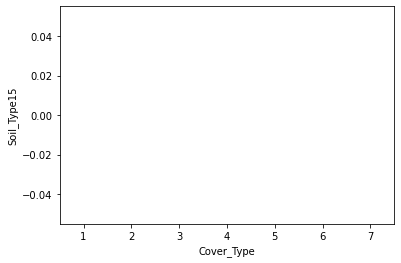

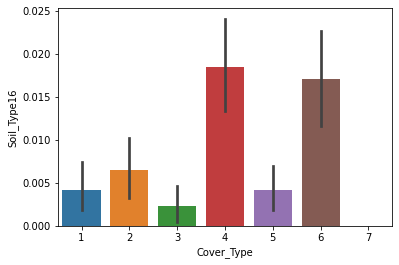

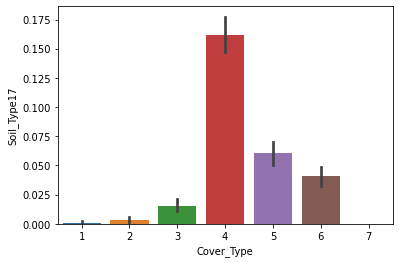

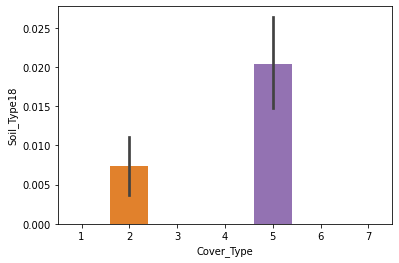

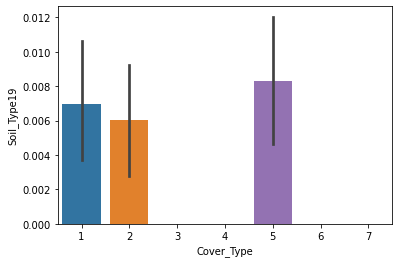

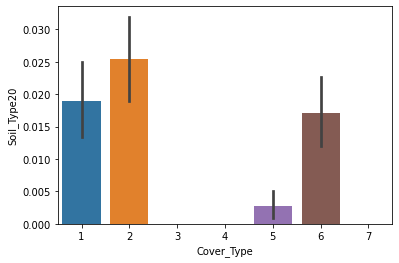

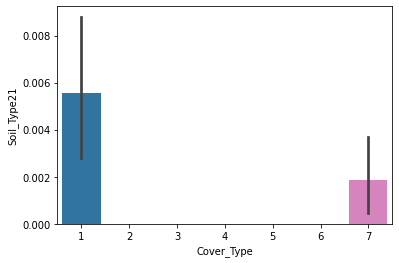

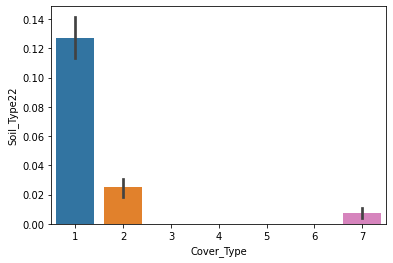

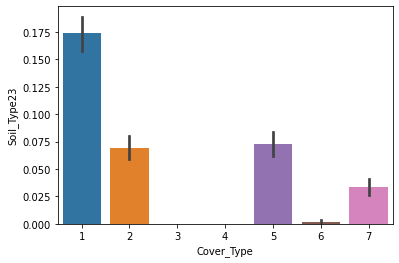

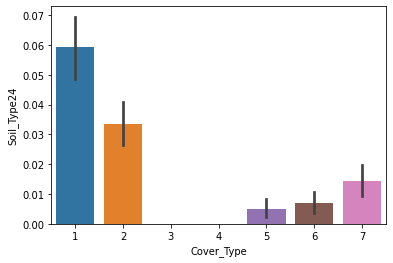

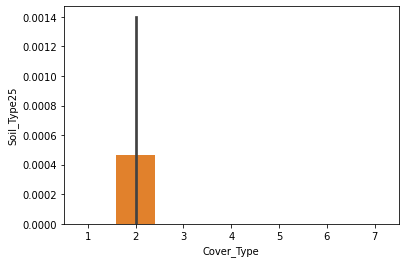

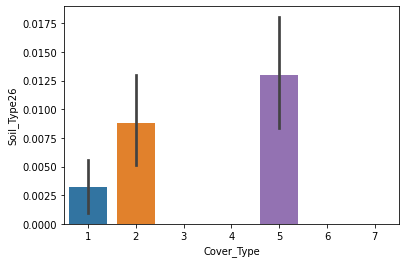

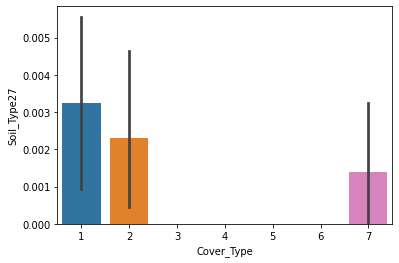

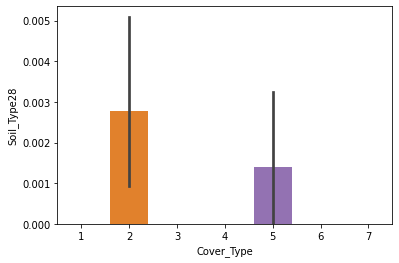

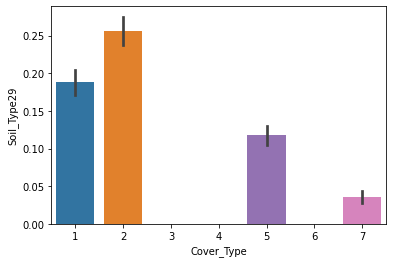

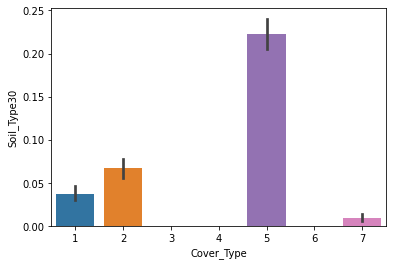

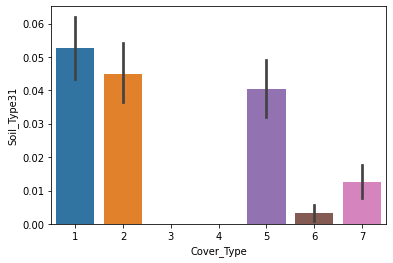

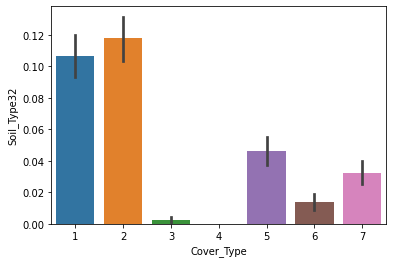

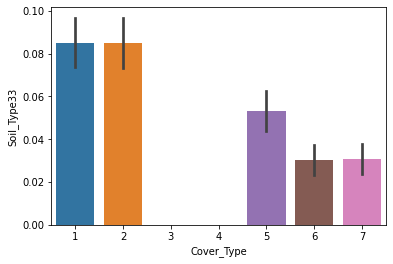

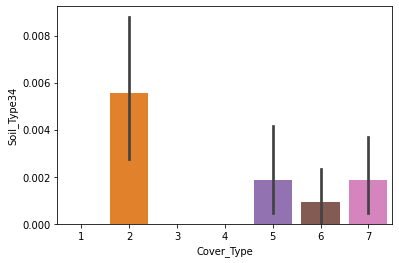

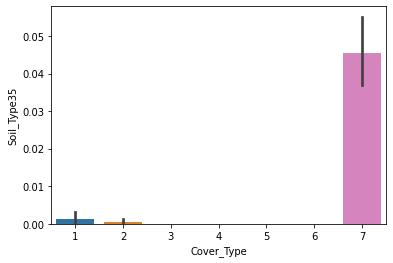

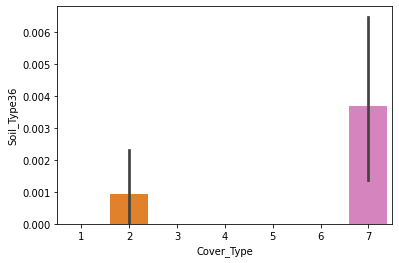

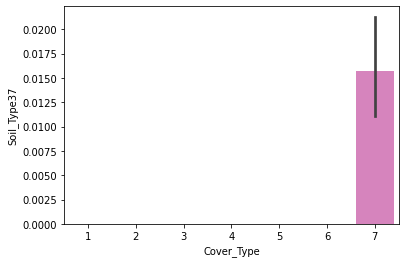

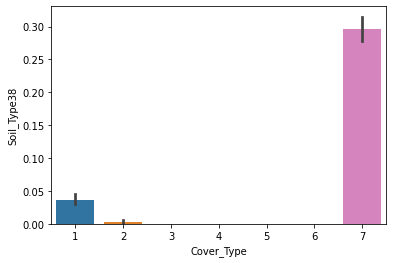

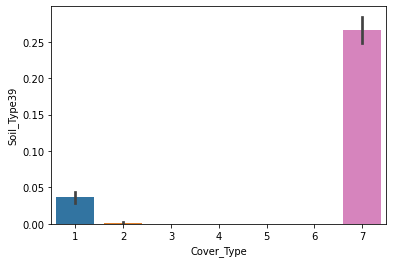

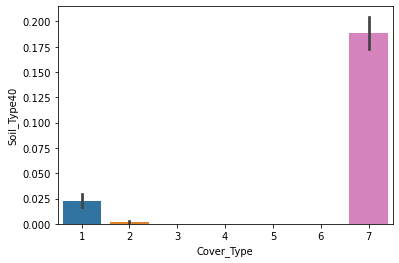

In [23]:
# Visualize the interesting numerical attributes based on their average value
    # We will visualize all the attributes using Bar plots
        # Black tips on bars are error bars- show variability of data (standard devation)

#names of all the attributes 
cols = training.columns

#number of attributes (exclude target)
size = len(cols)-1

#x-axis has target attribute to distinguish between classes
x = cols[size]

#y-axis shows values of an attribute
y = cols[0:size]

#Plot violin for all attributes
for i in range(0,size):
    sns.barplot(x=x, y=y[i], data=training)
    plt.show()

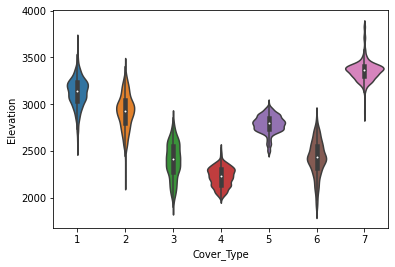

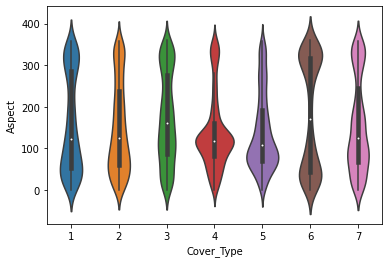

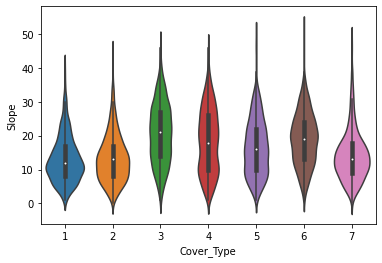

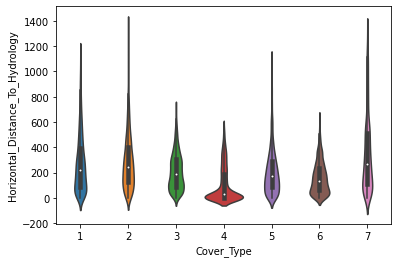

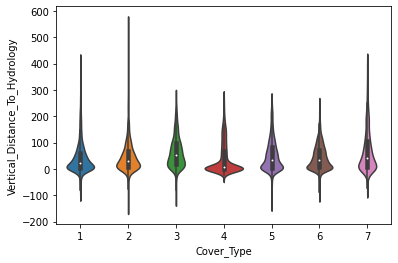

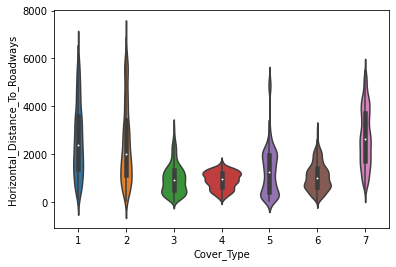

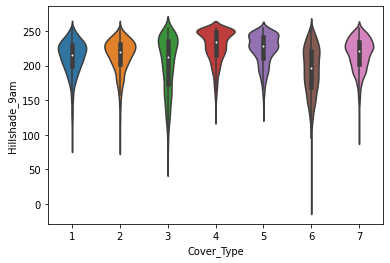

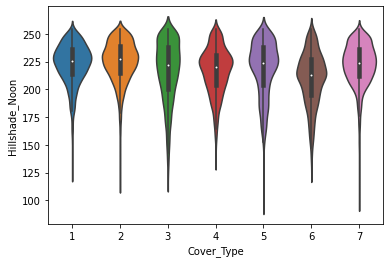

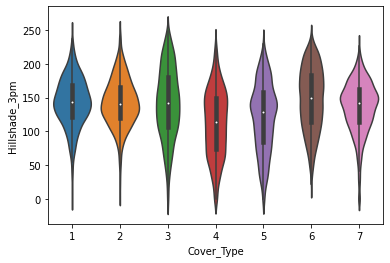

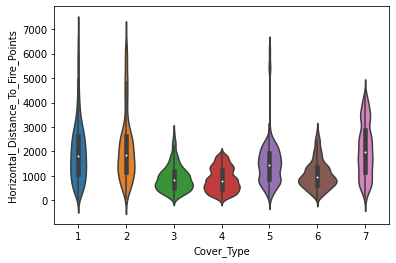

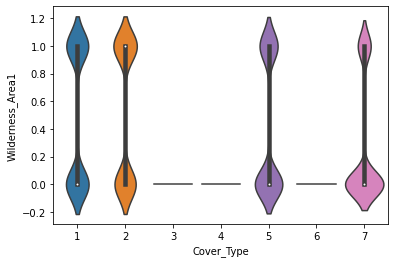

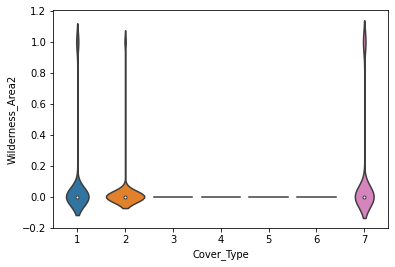

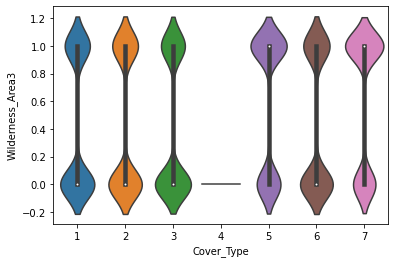

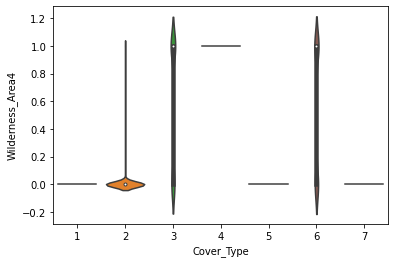

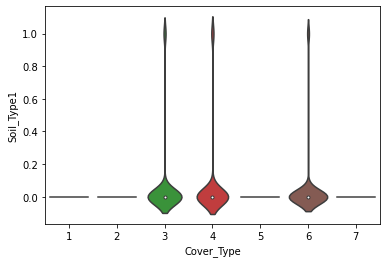

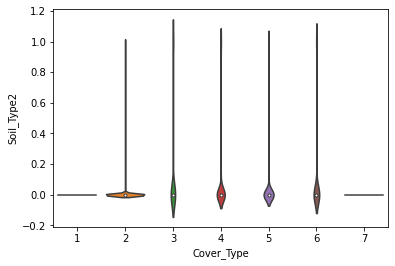

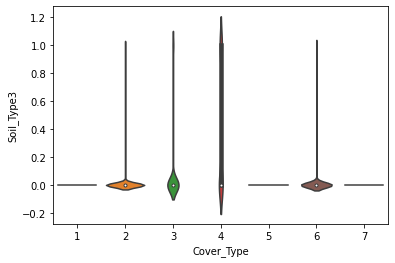

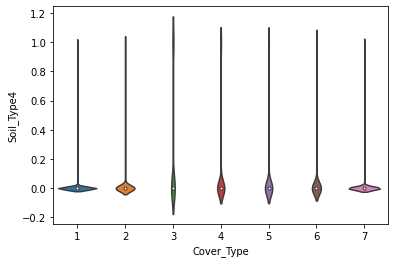

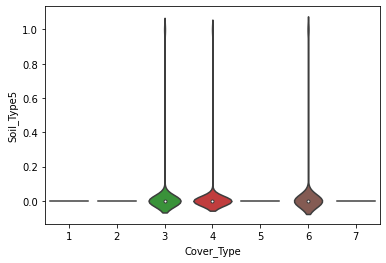

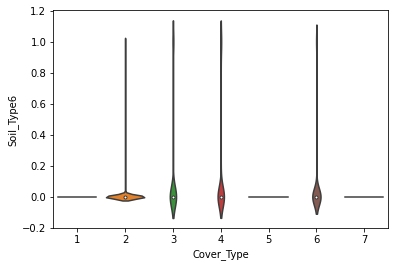

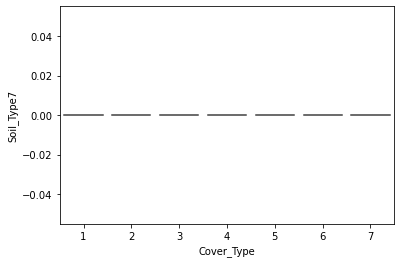

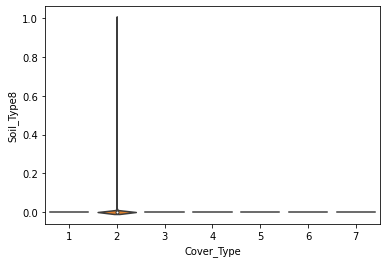

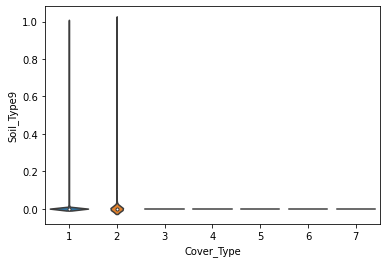

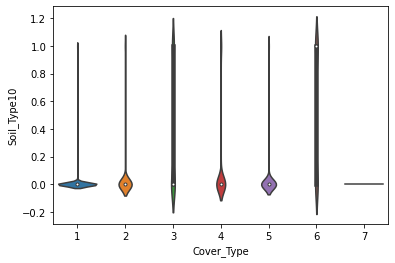

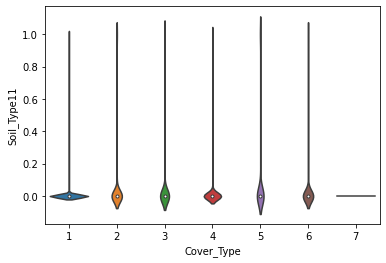

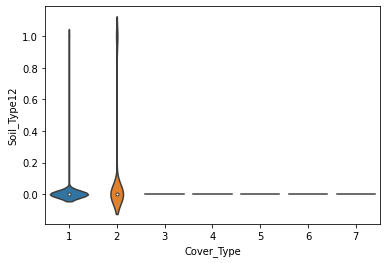

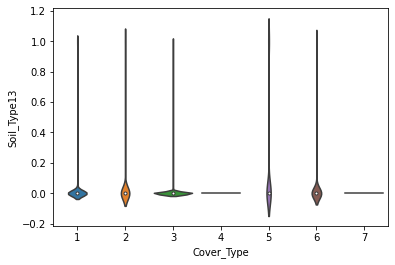

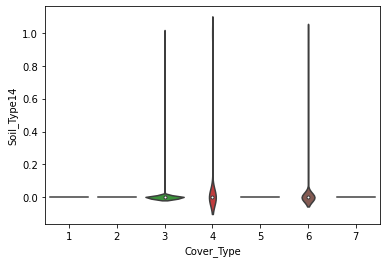

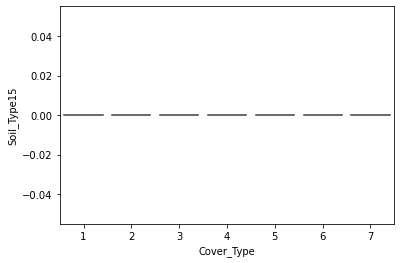

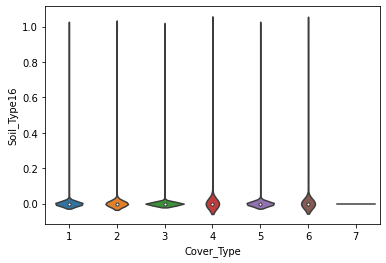

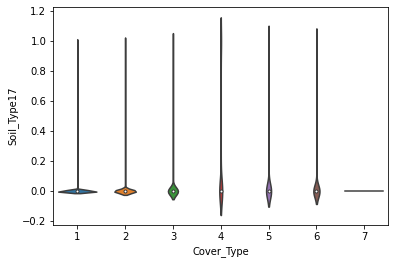

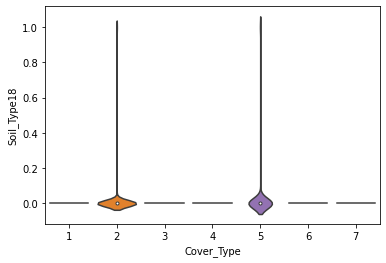

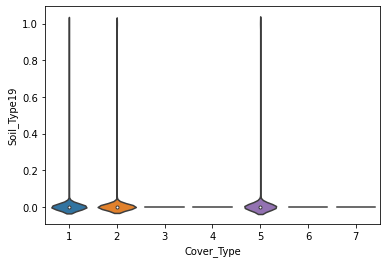

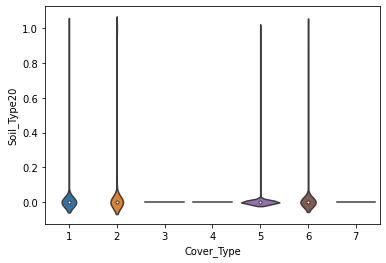

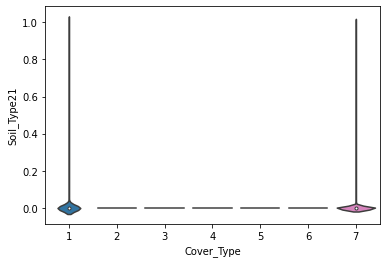

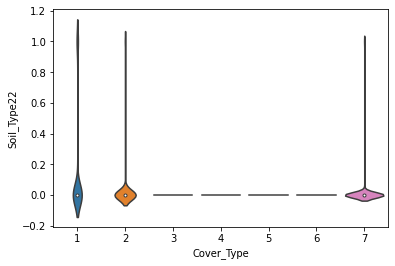

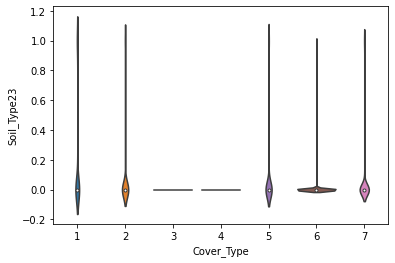

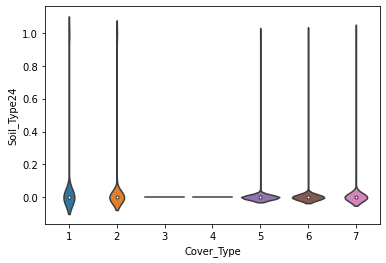

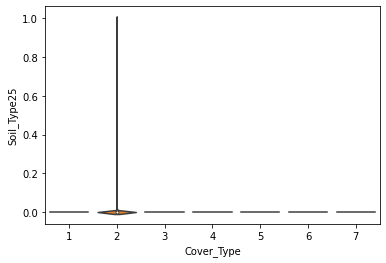

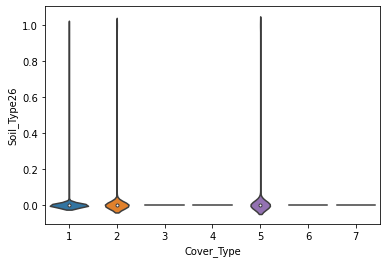

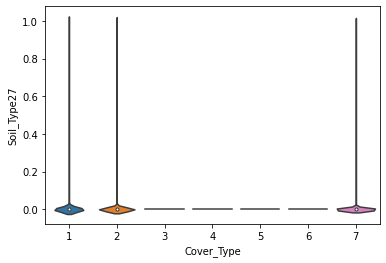

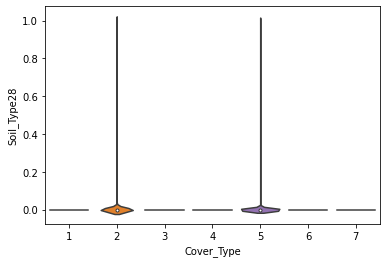

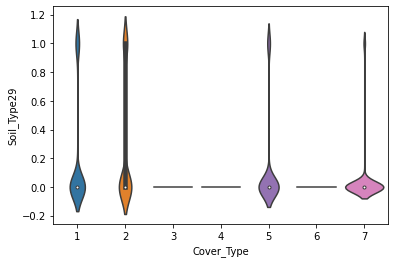

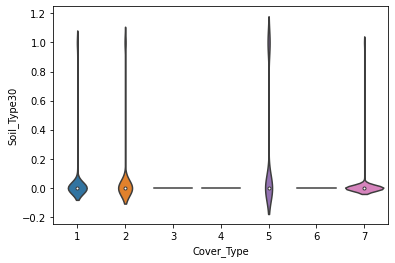

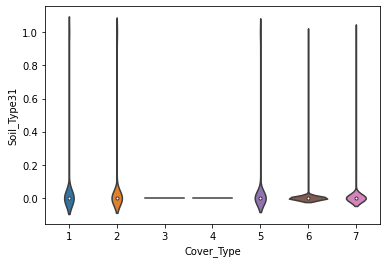

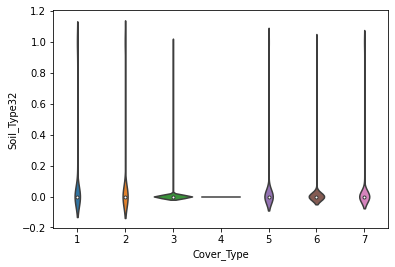

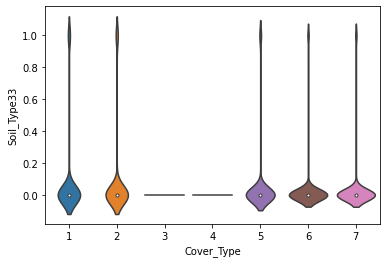

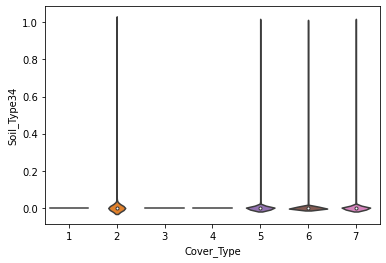

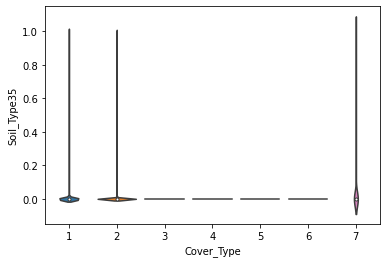

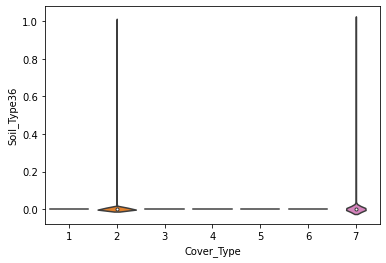

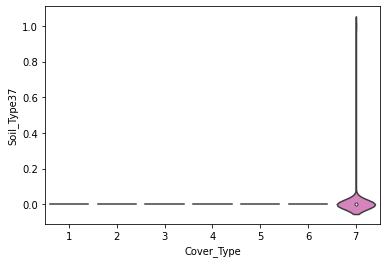

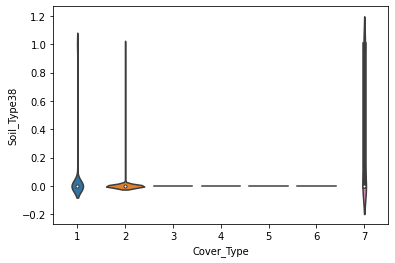

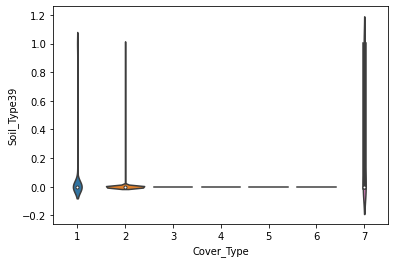

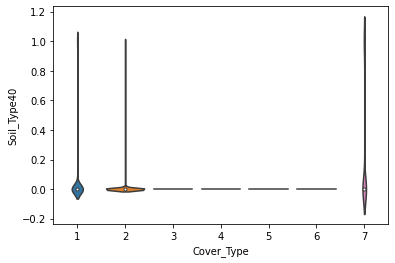

In [24]:
# We will visualize all the attributes using Violin Plot - a combination of box and density plots

#names of all the attributes 
cols = training.columns

#number of attributes (exclude target)
size = len(cols)-1

#x-axis has target attribute to distinguish between classes
x = cols[size]

#y-axis shows values of an attribute
y = cols[0:size]

#Plot violin for all attributes
for i in range(0,size):
    sns.violinplot(data=training,x=x,y=y[i])  
    plt.show()

# Elevation is strongly correlated with Cover_Type
#Aspect contains a couple of normal distribution for several classes
#Horizontal distance to road, fire points hydrology have similar distribution
#Hillshade 9am and 12pm display left skew
#Hillshade 3pm is normal
#Lots of 0s in vertical distance to hydrology


## Elevation vs Horizontal Distances by Cover Type

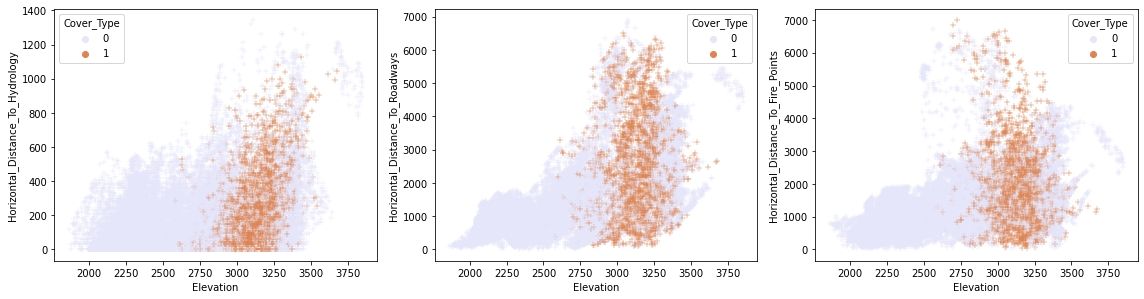

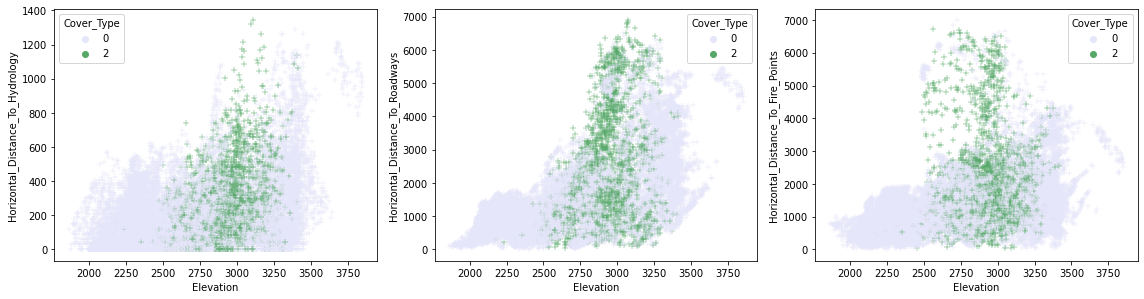

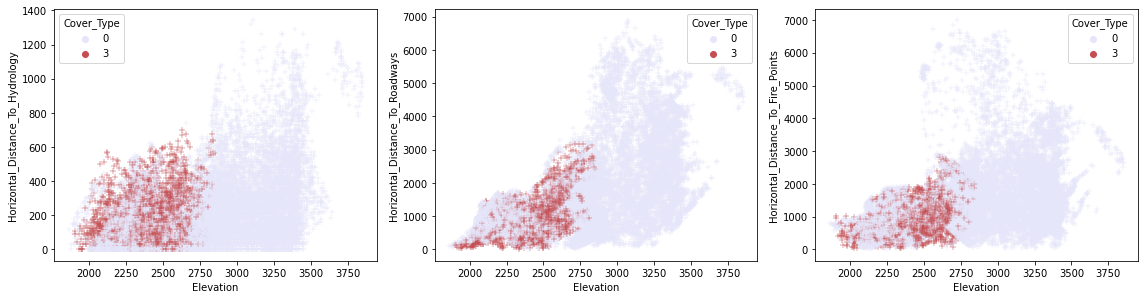

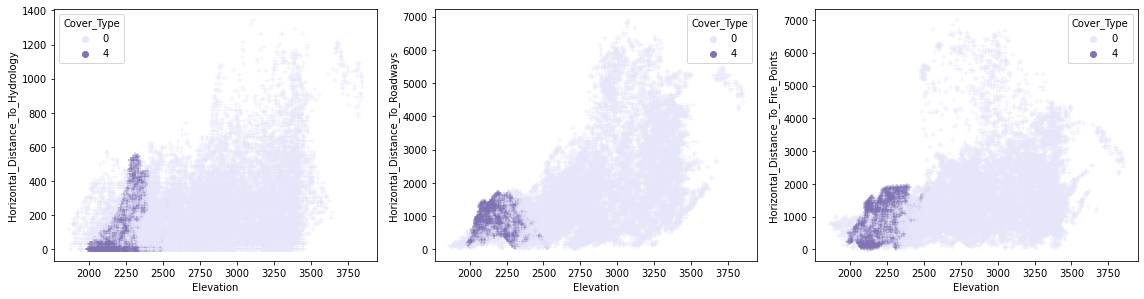

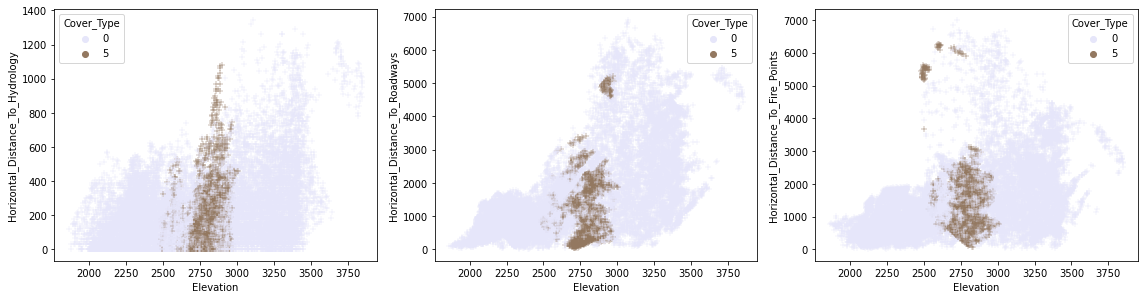

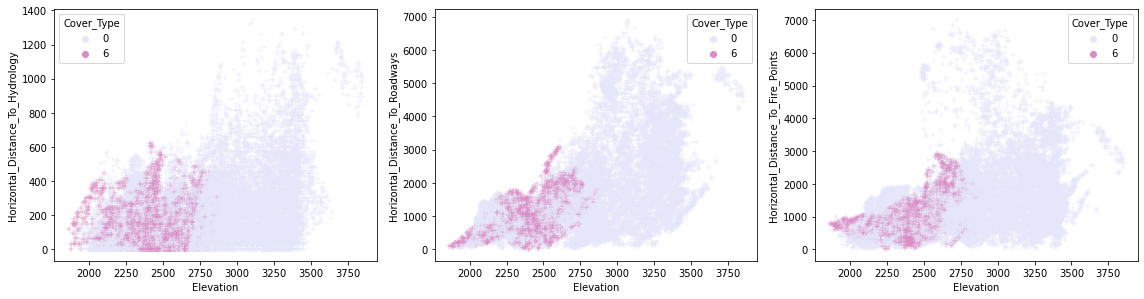

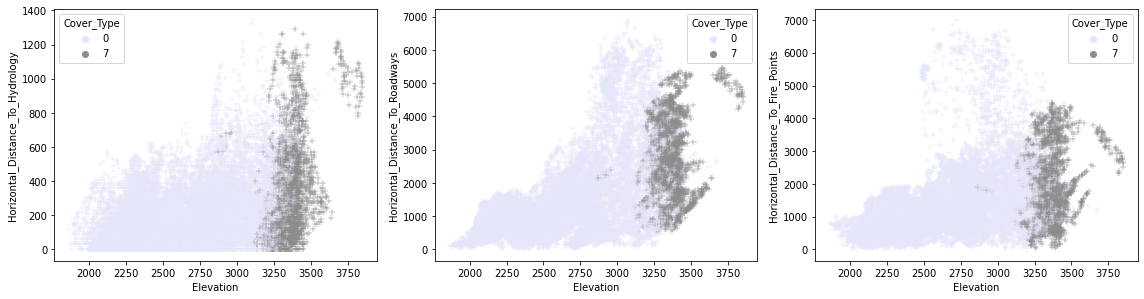

In [25]:
# Make array 'plot_features' with Horizontal Distance columns

plot_features = ['Horizontal_Distance_To_Hydrology', 
                 'Horizontal_Distance_To_Roadways', 
                 'Horizontal_Distance_To_Fire_Points']

# pick a Seaborn color pallete
colors = sns.color_palette('deep')

# Make a copy of the training data
sample = training.copy()

#Set up a for loop

#Loop through Cover values 1-6
for cover in [1,2,3,4,5,6,7]:
    
    # Rest = every element in the list except for the current cover element
    rest = list(set([1,2,3,4,5,6,7]) - set([cover]))
    
    # Copy Cover_Type from training set
    sample['Cover_Type'] = training['Cover_Type'].copy()
    
    # Set every value from the "rest" list to 0
    sample['Cover_Type'] = sample['Cover_Type'].replace(rest, 0)
    
    # create a figure object
    fig = plt.figure(figsize=(16, 12))
    #Choose colors
    palette = ['lavender', colors[cover]]
    
    # For loop to create scatterplots
    
    #Loops 1-3 because we are trying to show 3 Horizontal distances
    for i in range(3):
        
        # The first (3,3) defines the setup of the subpl0t
        # i+1 loops through all of the i values, which will loop through the 3 elements in plot_features(Horizontal Distances)
        fig.add_subplot(3, 3, i+1)
        
        # X axis = elevation
        # Y axis is a loop through the Horizontal distances
        # data= our new sample
        # Hue = the Cover type for this given loop
        # Marker = what is on the scatterplot (+ is a little + on it)
        # palette = the colors we picked above
        
        ax = sns.scatterplot(x='Elevation', 
                             y=plot_features[i], 
                             data=sample, 
                             hue='Cover_Type',
                             marker='+',
                             palette=palette)
    #tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area. 
    plt.tight_layout()
    plt.show()

In [26]:
# Quick for loop to get numbered list of columns for use below
for col in training.columns:
    print(training.columns.get_loc(col),col)     

0 Elevation
1 Aspect
2 Slope
3 Horizontal_Distance_To_Hydrology
4 Vertical_Distance_To_Hydrology
5 Horizontal_Distance_To_Roadways
6 Hillshade_9am
7 Hillshade_Noon
8 Hillshade_3pm
9 Horizontal_Distance_To_Fire_Points
10 Wilderness_Area1
11 Wilderness_Area2
12 Wilderness_Area3
13 Wilderness_Area4
14 Soil_Type1
15 Soil_Type2
16 Soil_Type3
17 Soil_Type4
18 Soil_Type5
19 Soil_Type6
20 Soil_Type7
21 Soil_Type8
22 Soil_Type9
23 Soil_Type10
24 Soil_Type11
25 Soil_Type12
26 Soil_Type13
27 Soil_Type14
28 Soil_Type15
29 Soil_Type16
30 Soil_Type17
31 Soil_Type18
32 Soil_Type19
33 Soil_Type20
34 Soil_Type21
35 Soil_Type22
36 Soil_Type23
37 Soil_Type24
38 Soil_Type25
39 Soil_Type26
40 Soil_Type27
41 Soil_Type28
42 Soil_Type29
43 Soil_Type30
44 Soil_Type31
45 Soil_Type32
46 Soil_Type33
47 Soil_Type34
48 Soil_Type35
49 Soil_Type36
50 Soil_Type37
51 Soil_Type38
52 Soil_Type39
53 Soil_Type40
54 Cover_Type


In [27]:
# Group one-hot encoded variables of a category into one single variable
    # One hot encoded variables are representations of categorical variables as binary vectors
        # For example, Wilderness_Area is represented as a binary vector in 4 columns for each of the 4 wilderness areas


#names of all the columns
cols = training.columns

# Training.shape returns an array of number of rows, number of columns
    # So number of rows=r , number of columns=c
r,c = training.shape

#Create a new dataframe with r rows, one column for each encoded category, and target in the end

data = pd.DataFrame(index=np.arange(0, r),columns=['Wilderness_Area','Soil_Type','Cover_Type'])

# We now have an empty dataframe with rows= number of rows in Training and a column for each of our 
data

,Wilderness_Area,Soil_Type,Cover_Type
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
15115,NaN,NaN,NaN
15116,NaN,NaN,NaN
15117,NaN,NaN,NaN
15118,NaN,NaN,NaN


In [28]:
#Make an entry in 'data' for each r as category_id, target value

# For loop in range (0 up to the number of rows in 'Data'- which is 15,120)
    # Range (0,15120) is actually 0-15119

for i in range(0,r):
    w=0;
    s=0;
    
    # Category1 range - FInd Wilderness area
        # 10-13 Is the column of the first wilderness area through the column of the first soil type 
            # Range (10,14) is actually the numbers 10-13 
            
    for j in range(10,14):
        
        # (training.iloc[row,column] returns the value at the row, column location. 
            #So if there is a 1 at this location that means this row has a binary "yes" identifying it as being from that wilderness location
            # For example, training.iloc[i,j] will evaluate to 1 if i= 5 and j=10, and at that "cell (5,10)" the binary identifier is yes
                # column 10 is Wilderness area 1
            # So once we evaluate to yes, we move onto the steps below the if statements
            
        if (training.iloc[i,j] == 1):
            
            # W is going to be our wilderness location when we input below 
                # So, using the above example (i=5, j=10), wilderness area would be set to 10-9 =1. 
                # w =1
                     # If the area in row 5 had been of Wilderness Area 2, it would have looped through once more. 
                        # So J would have equaled 11.
                            # W would have equaled (11-9)=2
                        
            w=j-9  # Wilderness Area input. 10-9=1
            
            # now we have a W value, so we stop the loop for finding wilderness area for this given row and move on to find soil type
            break
            
    # Category2 range   
        # 14-54 is the column of the first soil type through the column of the last soil type 
              # Range (14,54) is actually the numbers 14-53
                # If you look above to the numbered for loop column list, 53 is the last soil column
            
    for k in range(14,54):
        
         # (training.iloc[row,column] returns the value at the row, column location. 
            #So if there is a 1 at this location that means this row has a binary "yes" identifying it as being of that soil
            # For example, training.iloc[i,k] will evaluate to 1 if i= 5 and k=43, and at that "cell (5,43)" the binary identifier is yes
                # column 43 is soil type 30
            # So once we evaluate to yes, we move onto the steps below the if statements
            
        if (training.iloc[i,k] == 1):
            
                # S is going to be our wilderness location when we input below 
                # So, using the above example (i=5, k=43), wilderness area would be set to 43-13 =30. 
                # s = 30
                     # If the area in row 5 had been of Soil Type 31, it would have looped through once more. 
                        # So k would have equaled 44.
                            # S would have equaled (44-13)=31
            
            s=k-13 # Soil Type input. 43-13=30
            
            # now we have a S value, so we stop the loop for finding Soil Type for this given row and move on to input the values
            break
    
    
    # Make an entry in 'data' for each r
    
        # Set the row i = 5 to a 3 element array that fills in the 3 empty columns in the 'data' table.
            # 3 elements are wilderness area, soil type, and Cover type
        
        # i is the row in question - 5 in this example
        # w is the wilderness area - (10-9)=1 in this example 
        #S is the soil type - (43-13) = 30 in this example 
        #training.iloc[i,c-1] is the cover type
            #Cover type is not broken out into one hot encoded variables so we can just index it by using training.iloc
                # i = the row in question, 5 in this example
                # c - 1 gets us the last row of the training set
                
          
    data.iloc[i]=[w,s,training.iloc[i,c-1]]

In [29]:
# Now our data table is populated
data

,Wilderness_Area,Soil_Type,Cover_Type
0,1,29,5
1,1,29,5
2,1,12,2
3,1,30,2
4,1,29,5
...,...,...,...
15115,3,4,3
15116,3,4,3
15117,3,4,3
15118,3,4,3


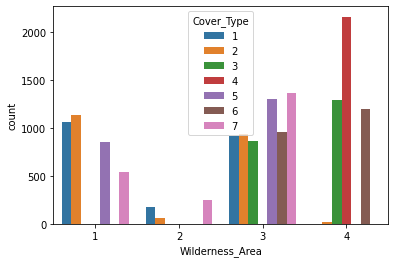

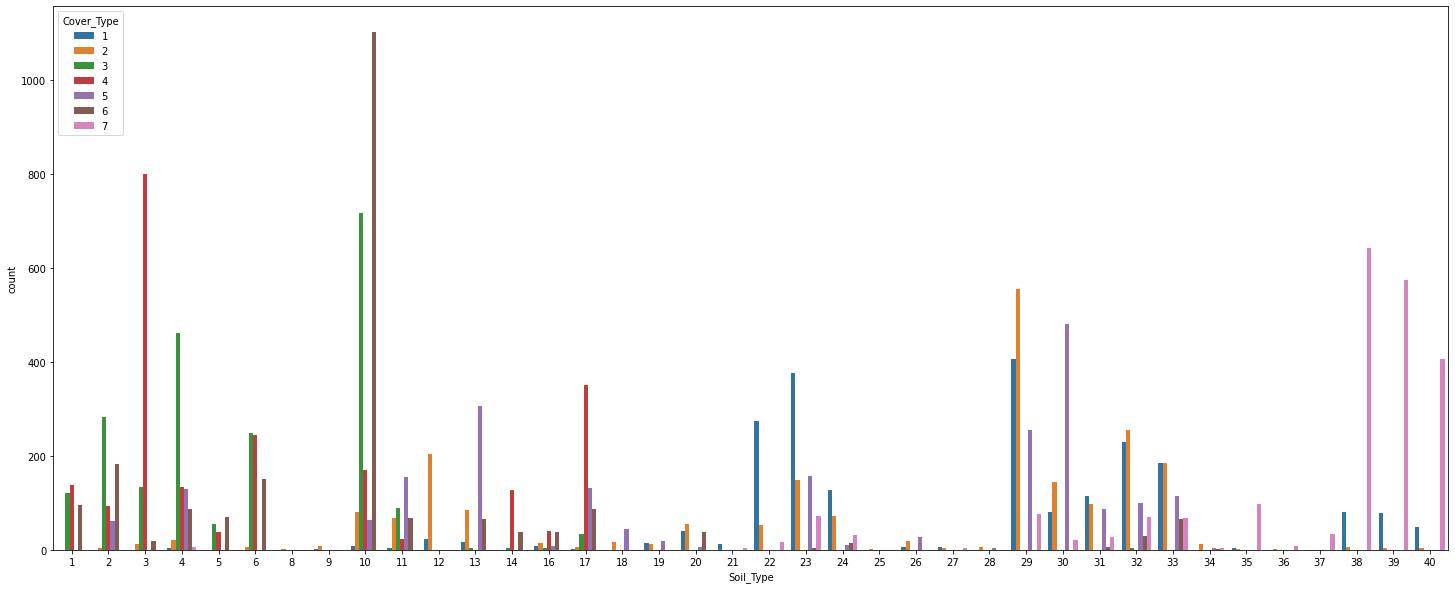

In [30]:
#Plot for Wilderness Area  
sns.countplot(x="Wilderness_Area", hue="Cover_Type", data=data)
plt.show()

#Plot for Soil Type
plt.rc("figure", figsize=(25, 10))
sns.countplot(x="Soil_Type", hue="Cover_Type", data=data)
plt.show()

#(right-click and open the image in a new window for larger size)
#WildernessArea_4 has a lot of presence for cover_type 4. Good class distinction
#WildernessArea_3 has not much class distinction
#SoilType 1-6,10-14,17, 22-23, 29-33,35,38-40 offer lot of class distinction as counts for some are very high

## Data Cleaning  
Remove unnecessary columns

In [31]:
#Removal list initialize
# Set it up as a blank list
rem = []

# Remove constant columns as they don't help in prediction process
for c in training.columns:
    if training[c].std() == 0: #standard deviation is zero
        
        #Append the columns with std ==0 into the blank list
        rem.append(c)

#drop the columns
#.drop(labels, axis, inplace)
    #labels= the column labels to drop
        # In this case it is all of the columns in rem
    # Axis= 1 means to drop columns
    # Inplace = true returns none, deletes columns
    
training.drop(rem,axis=1,inplace=True)
print(rem)

#Following columns are dropped- the ones that had 0 Std dev
# In this case it was 7 and 15, because no areas had those soil types so all of their values were 0


['Soil_Type7', 'Soil_Type15']


In [32]:
# 7 and 15 are gone
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

## Data Preparation  

1. Original
2. Delete rows or impute values in case of missing
3. StandardScaler
4. MinMaxScaler
5. Normalizer

In [33]:
#get the number of rows and columns
r, c = training.shape

#get the list of columns
cols = training.columns

#create an array which has indexes of columns

#blank array
i_cols = []

# loop from range (0,52)
    #(53-1)
    # Real range is 0-51
for i in range(0,c-1):
    
    # append columns, means you are adding those numbers to the array. So you will end up with a list from 0-51
    i_cols.append(i)

In [34]:
r,c

(15120, 53)

In [35]:
cols

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type'],
      dtype

In [36]:
i_cols

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51]

In [37]:
# Creates a blank array
ranks = []

# Creates a numpy representation of the values in a dataframe
array = training.values

In [38]:
# Look at the training dataframe to understand what we are doing next. 
#Note that Elevation begins with 2596 and cover_type begins with 5
training

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,...,0,0,0,0,0,0,0,0,0,3
15116,2603,121,19,633,195,618,249,221,91,1325,...,0,0,0,0,0,0,0,0,0,3
15117,2492,134,25,365,117,335,250,220,83,1187,...,0,0,0,0,0,0,0,0,0,3
15118,2487,167,28,218,101,242,229,237,119,932,...,0,0,0,0,0,0,0,0,0,3


In [39]:
# So this array gives us all of the values up until, but not including the last column, which is cover_type
# all of the columns with indexes between 0 (which is elevation) and c-1 (which is index 52, which is  Soil_Type40)
X = array[:,0:(c-1)]
X

array([[2596,   51,    3, ...,    0,    0,    0],
       [2590,   56,    2, ...,    0,    0,    0],
       [2804,  139,    9, ...,    0,    0,    0],
       ...,
       [2492,  134,   25, ...,    0,    0,    0],
       [2487,  167,   28, ...,    0,    0,    0],
       [2475,  197,   34, ...,    0,    0,    0]])

In [40]:
len(X)

15120

In [41]:
# This array gives us all of the values in index 53
Y = array[:,(c-1)]
Y

array([5, 5, 2, ..., 3, 3, 3])

In [42]:
# This would take in the whole array
X1 = array[:,0:c]
X1

array([[2596,   51,    3, ...,    0,    0,    5],
       [2590,   56,    2, ...,    0,    0,    5],
       [2804,  139,    9, ...,    0,    0,    2],
       ...,
       [2492,  134,   25, ...,    0,    0,    3],
       [2487,  167,   28, ...,    0,    0,    3],
       [2475,  197,   34, ...,    0,    0,    3]])

In [43]:
# This would give us everything in soil_type40
Y1 = array[:,(c-2)]
Y1

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
# set Validation chunk size to 10% of the data
val_size = 0.1


In [45]:
#Use a common seed in all experiments so that same chunk is used for validation
seed = 0

In [46]:
import sklearn

In [47]:
# Split the data into chunks

# Import package (new name for cross_validation)
from sklearn import model_selection

# Train_test_split(arrays, test_size, random_state)
    # arrays = the data inputs. 
        # X is all of the data except for the cover_type
        # Y is just the cover type
        # test_size is the amount that goes into test, which is equal to 0.1 as per our val_size setting above
        # random state is how the data is shuffled up. We set our seed = 0 so the data is shuffled up the same way each time. 
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X,Y, test_size = val_size, random_state = seed)

In [48]:
# 90% of the X data
X_train

array([[2968,   64,   22, ...,    0,    0,    0],
       [2356,   69,   22, ...,    0,    0,    0],
       [2533,   54,    6, ...,    0,    0,    0],
       ...,
       [3515,  158,   27, ...,    0,    0,    0],
       [2575,   80,   35, ...,    0,    0,    0],
       [2738,  304,    9, ...,    0,    0,    0]])

In [49]:
# 10% of the X data
X_val

array([[2220,   18,   12, ...,    0,    0,    0],
       [2139,  119,   10, ...,    0,    0,    0],
       [2292,  109,   26, ...,    0,    0,    0],
       ...,
       [2396,  102,   13, ...,    0,    0,    0],
       [2372,   76,   19, ...,    0,    0,    0],
       [2354,  313,   23, ...,    0,    0,    0]])

In [50]:
# 90% of the Y data, which corresponds to the 90% of the X data in X_train
Y_train

array([1, 6, 6, ..., 7, 3, 5])

In [51]:
# 10% of the Y data, which corresponds to the 10% of the Y data in X_val
Y_val

array([4, 4, 4, ..., 6, 4, 6])

In [52]:
#Import libraries for data transformations
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer


In [53]:
#All features
    #Blank for now
X_all = []

#Additionally we will make a list of subsets
    #Blank for now
X_all_add =[]

In [54]:
#columns to be dropped
     #Blank for now
rem = []
#indexes of columns to be dropped
     #Blank for now
i_rem = []

In [55]:
#List of combinations
comb = []

# Add in All+1.0 as text?
comb.append("All+1.0")

In [56]:
# Look at what is currently in X_all
X_all

[]

In [57]:
#Add this version of X to the list 
X_all.append(['Orig','All', X_train,X_val,1.0,cols[:c-1],rem,ranks,i_cols,i_rem])

In [58]:
# Look at everything in X_all now
    # The word Orig
    # The word All
    # the X_train 90% of data
    # The X_Val 10% of data
    # the number 1.0
    # List of cols except Cover_type
    #Empty rem (columns to be dropped)
    # Empty ranks
    # List of column numbers except for the last one (53, cover_type)
    # empty i_rem (indexes of columns to be droppd)
    
X_all

[['Orig',
  'All',
  array([[2968,   64,   22, ...,    0,    0,    0],
         [2356,   69,   22, ...,    0,    0,    0],
         [2533,   54,    6, ...,    0,    0,    0],
         ...,
         [3515,  158,   27, ...,    0,    0,    0],
         [2575,   80,   35, ...,    0,    0,    0],
         [2738,  304,    9, ...,    0,    0,    0]]),
  array([[2220,   18,   12, ...,    0,    0,    0],
         [2139,  119,   10, ...,    0,    0,    0],
         [2292,  109,   26, ...,    0,    0,    0],
         ...,
         [2396,  102,   13, ...,    0,    0,    0],
         [2372,   76,   19, ...,    0,    0,    0],
         [2354,  313,   23, ...,    0,    0,    0]]),
  1.0,
  Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
         'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
         'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
         'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
         'Wilderness_Area2', 'Wilde

In [59]:
#point where categorical data begins (there are 10 columns of numerical data then it goes to wilderness_area1)
size=10

In [60]:
#Standardized
#Apply transform only for non-categorical data
# Makes data normally distributed with 0 mean, Std of 1
X_temp = StandardScaler().fit_transform(X_train[:,0:size])
X_val_temp = StandardScaler().fit_transform(X_val[:,0:size])

(array([[0.000e+00, 0.000e+00, 0.000e+00, 3.383e+03, 6.126e+03, 4.040e+03,
         5.900e+01, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 2.992e+03, 6.622e+03, 3.994e+03,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 2.469e+03, 7.403e+03, 3.398e+03,
         3.300e+02, 8.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 2.474e+03, 8.162e+03, 2.406e+03,
         4.380e+02, 1.260e+02, 2.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 1.000e+01, 7.100e+02, 9.960e+03, 2.308e+03,
         5.470e+02, 5.800e+01, 1.200e+01, 3.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 2.056e+03, 8.637e+03, 2.171e+03,
         7.390e+02, 5.000e+00, 0.000e+00, 0.000e+00],
        [1.000e+00, 2.200e+01, 3.580e+02, 1.983e+03, 7.026e+03, 4.218e+03,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 2.900e+01, 3.150e+02, 1.982e+03, 7.232e+03, 4.050e+03,
         0.000e+00, 0.

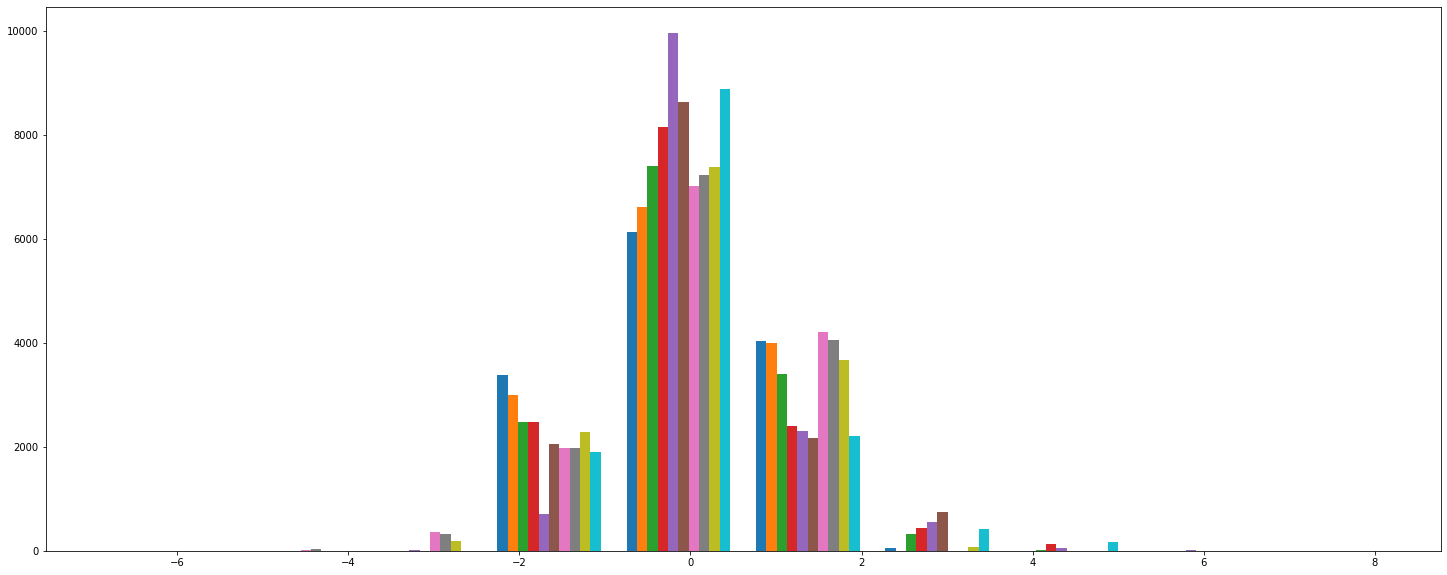

In [61]:
# normal distribution
plt.hist(X_temp)

(array([[0.0000e+00, 0.0000e+00, 8.4000e+01, 6.1670e+03, 6.9640e+03,
         3.9300e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.3608e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.3608e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.2640e+04, 9.6500e+02, 3.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.3608e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.2970e+03, 4.3190e+03, 2.8000e+03, 1.6160e+03, 8.7400e+02,
         6.5100e+02, 5.1700e+02, 3.6100e+02, 1.5500e+02, 1.8000e+01],
        [1.3608e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.3608e+04, 0.0000

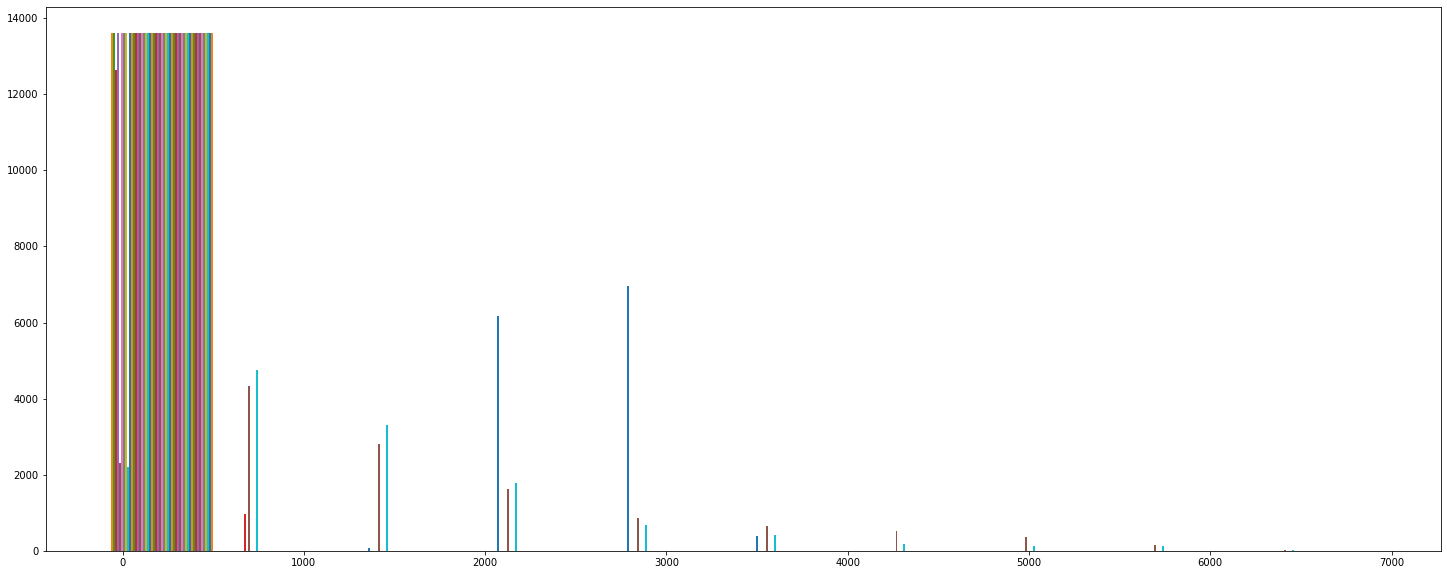

In [62]:
# not normal dist
plt.hist(X_train)

In [63]:
# not one
X_train.std()

540.0923551182498

In [64]:
# basically 1 
X_temp.std()

0.9999999999999989

In [65]:
# not 0
X_train.mean()

134.2995424071813

In [66]:
# basically 0
X_temp.mean()

-6.652200509688181e-17

In [67]:
#Concatenate non-categorical data and categorical
    # X_temp contains a scaled version of the numerical data, which we isolated using(X_train[:,0:size])
        # That gave us all of the columns between column 0 and the 10th column
            # beause size = 10
            # 10th column was the last numerical column
    #X_train[:,size:] gives us all of the columns from the 10th on
        #which is all of the categocial variables
#now X_con is a concatentation of the two 


X_con = np.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = np.concatenate((X_val_temp,X_val[:,size:]),axis=1)

In [68]:
#Add this version of X to the list 

# old version
    #X_all.append(['Orig','All', X_train,X_val,1.0,cols[:c-1],rem,ranks,i_cols,i_rem])
X_all.append(['StdSca','All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])

In [69]:
#MinMax
    #For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. 
    #The range is the difference between the original maximum and original minimum.
#Apply transform only for non-categorical data
    # In order to isolate non-categorical data,use (X_train[:,0:size])
X_temp = MinMaxScaler().fit_transform(X_train[:,0:size])
X_val_temp = MinMaxScaler().fit_transform(X_val[:,0:size])

In [70]:
#X_temp min/maxed
X_temp

array([[0.55639476, 0.17777778, 0.42307692, ..., 0.58064516, 0.31048387,
        0.08465608],
       [0.24823766, 0.19166667, 0.42307692, ..., 0.6       , 0.30645161,
        0.12984413],
       [0.33736153, 0.15      , 0.11538462, ..., 0.82580645, 0.55645161,
        0.34763335],
       ...,
       [0.83182276, 0.43888889, 0.51923077, ..., 0.85806452, 0.42741935,
        0.16302016],
       [0.35850957, 0.22222222, 0.67307692, ..., 0.36129032, 0.05241935,
        0.15501216],
       [0.44058409, 0.84444444, 0.17307692, ..., 0.88387097, 0.72580645,
        0.1046761 ]])

In [71]:
#Concatenate non-categorical data and categorical
X_con = np.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = np.concatenate((X_val_temp,X_val[:,size:]),axis=1)

In [72]:
#Add this version of X to the list 
    # Now has been appended 3x
        # 1. X_all.append(['Orig','All', X_train,X_val,1.0,cols[:c-1],rem,ranks,i_cols,i_rem])
        # 2. X_all.append(['StdSca','All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])
        # 3. no the below, for minmax
X_all.append(['MinMax', 'All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])

In [73]:
#Normalize
    #Normalization refers to rescaling real-valued numeric attributes into a 0 to 1 range
#Apply transform only for non-categorical data
X_temp = Normalizer().fit_transform(X_train[:,0:size])
X_val_temp = Normalizer().fit_transform(X_val[:,0:size])

#Concatenate non-categorical data and categorical
X_con = np.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = np.concatenate((X_val_temp,X_val[:,size:]),axis=1)

#Add this version of X to the list 
X_all.append(['Norm', 'All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])

In [74]:
#Normalized X_temp
    # All between 0 and 1
X_temp

array([[0.95407868, 0.02057313, 0.00707201, ..., 0.06075501, 0.02475204,
        0.19030141],
       [0.88986326, 0.02606136, 0.00830942, ..., 0.07251857, 0.02870527,
        0.3429524 ],
       [0.5851634 , 0.01247486, 0.0013861 , ..., 0.05244062, 0.0318802 ,
        0.56159977],
       ...,
       [0.71463822, 0.03212314, 0.0054894 , ..., 0.04716816, 0.02155097,
        0.23177456],
       [0.78660435, 0.02443819, 0.01069171, ..., 0.047349  , 0.00397121,
        0.33113752],
       [0.78836571, 0.0875322 , 0.00259141, ..., 0.06795263, 0.05182828,
        0.21076833]])

In [75]:
# Impute
    # Imputer not needed as all data is present as seen below
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

In [76]:
# Make a blank list of transformation
trans_list = []

In [77]:
X_all

[['Orig',
  'All',
  array([[2968,   64,   22, ...,    0,    0,    0],
         [2356,   69,   22, ...,    0,    0,    0],
         [2533,   54,    6, ...,    0,    0,    0],
         ...,
         [3515,  158,   27, ...,    0,    0,    0],
         [2575,   80,   35, ...,    0,    0,    0],
         [2738,  304,    9, ...,    0,    0,    0]]),
  array([[2220,   18,   12, ...,    0,    0,    0],
         [2139,  119,   10, ...,    0,    0,    0],
         [2292,  109,   26, ...,    0,    0,    0],
         ...,
         [2396,  102,   13, ...,    0,    0,    0],
         [2372,   76,   19, ...,    0,    0,    0],
         [2354,  313,   23, ...,    0,    0,    0]]),
  1.0,
  Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
         'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
         'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
         'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
         'Wilderness_Area2', 'Wilde

In [78]:
 # X_all Now has been appended 3x
        # 1. X_all.append(['Orig','All', X_train,X_val,1.0,cols[:c-1],rem,ranks,i_cols,i_rem])
        # 2. X_all.append(['StdSca','All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])
        # 3. X_all.append(['MinMax', 'All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])
        # 4. X_all.append(['Norm', 'All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])

In [79]:
len(X)

15120

In [80]:
# the 10 arguments below refer to the 10 contents within X_all. 
    # Trans = orig
    # name = all
    # etc
for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
    trans_list.append(trans)

trans_list

['Orig', 'StdSca', 'MinMax', 'Norm']

In [81]:
len(X)

13608

## Feature Selection  
1. ExtraTreesClassifier
2. GradientBoostingClassifier
3. RandomForestClassifier
4. XGBoost classifier

In [82]:
# Put top 75%, 50% and 25% into an array
ratio_list = [0.75, 0.50, 0.25]

In [83]:
# Make a blank list for feature selection models
feat = []

# Make a blank list for the names of feature selection models
feat_list = []

# Import libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [84]:
feat_list

[]

In [85]:
ratio_list

[0.75, 0.5, 0.25]

In [86]:
comb

['All+1.0']

In [87]:
# Add ExtraTreesClassifier to the list

# name of ensemble learning method
n = 'ExTree'

#append name of ensemble learning method onto blank feature list
feat_list.append(n)

#ratio_list currently contains [0.75, 0.50, 0.25]
for val in ratio_list:
    # Comb currently has All+1.0. Comb is the list of combinations
    # "%s+%s" allows you to format the string you put in parenthesis after the %.
    # In this case it formats n, which is Extree, and a loop of the vals in ratio_list, which are 0.75, 0.5, and 0.25
    comb.append ("%s+%s" % (n,val))
    
    #append Extree, a loop of the ratio_list vals, and a set of features. 
    # n_features is constand based on C.
    # mx+features = val from ratio_list
    # n_jobs = -1
    # random_state = seed = 0
    feat.append([n,val,ExtraTreesClassifier(n_estimators = c-1, max_features=val,n_jobs=-1, random_state=seed)])

In [88]:
# Add GradientBoostingClassifiers to the list 
n = 'GraBst'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,GradientBoostingClassifier(n_estimators=c-1,max_features=val,random_state=seed)])   

In [89]:
#Add RandomForestClassifiers to the list 
n = 'RndFst'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,RandomForestClassifier(n_estimators=c-1,max_features=val,n_jobs=-1,random_state=seed)])   

#Add XGBClassifier to the list 
n = 'XGB'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,XGBClassifier(n_estimators=c-1,seed=seed)])   

In [90]:
# Now contains a list of the features
feat_list

['ExTree', 'GraBst', 'RndFst', 'XGB']

In [91]:
r

15120

In [92]:
comb

['All+1.0',
 'ExTree+0.75',
 'ExTree+0.5',
 'ExTree+0.25',
 'GraBst+0.75',
 'GraBst+0.5',
 'GraBst+0.25',
 'RndFst+0.75',
 'RndFst+0.5',
 'RndFst+0.25',
 'XGB+0.75',
 'XGB+0.5',
 'XGB+0.25']

In [93]:
feat

[['ExTree',
  0.75,
  ExtraTreesClassifier(max_features=0.75, n_estimators=52, n_jobs=-1,
                       random_state=0)],
 ['ExTree',
  0.5,
  ExtraTreesClassifier(max_features=0.5, n_estimators=52, n_jobs=-1,
                       random_state=0)],
 ['ExTree',
  0.25,
  ExtraTreesClassifier(max_features=0.25, n_estimators=52, n_jobs=-1,
                       random_state=0)],
 ['GraBst',
  0.75,
  GradientBoostingClassifier(max_features=0.75, n_estimators=52, random_state=0)],
 ['GraBst',
  0.5,
  GradientBoostingClassifier(max_features=0.5, n_estimators=52, random_state=0)],
 ['GraBst',
  0.25,
  GradientBoostingClassifier(max_features=0.25, n_estimators=52, random_state=0)],
 ['RndFst',
  0.75,
  RandomForestClassifier(max_features=0.75, n_estimators=52, n_jobs=-1,
                         random_state=0)],
 ['RndFst',
  0.5,
  RandomForestClassifier(max_features=0.5, n_estimators=52, n_jobs=-1,
                         random_state=0)],
 ['RndFst',
  0.25,
  RandomForest

In [94]:
len(X)

13608

In [95]:
len(Y)

15120

In [96]:
len(Y_train)

13608

In [97]:
# For everything in X_all ( sets of10 arguments)
for trans, s, X, X_val, d, cols, rem, ra, i_cols, i_rem in X_all:
    
    # For everything in feat (sets of 3 arguments)
    for name, v, model in feat:
    
        # Train model against Y
            # X = array[:,0:(c-1)]
            # Y_train = 90% of the Y data, which corresponds to the 90% of the X data in X_train
        model.fit(X,Y_train)
    
        joined = []
        for i, pred in enumerate(list(model.feature_importances_)):
            joined.append([i,cols[i],pred])
        #Sort in descending order    
        joined_sorted = sorted(joined, key=lambda x: -x[2])
        
        rem_start = int((v*(c-1)))
        
        cols_list = []
        
        i_cols_list = []
        
        rank_list = []
        
        rem_list = []
        
        i_rem_list = []
        
        for j, (i,col, x) in enumerate(list(joined_sorted)):
            
            rank_list.append([i,j])
            
            if(j<rem_start):
                cols_list.append(col)
                i_cols_list.append(i)
            else:
                rem_list.append(col)
                i_rem_list.append(i)
            
        X_all_add.append([trans,name,X,X_val,v,cols_list,rem_list,[x[1] for x in sorted(rank_list, key = lambda x:x[0])], i_cols_list, i_rem_list])

[04:09:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:09:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:09:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:10:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

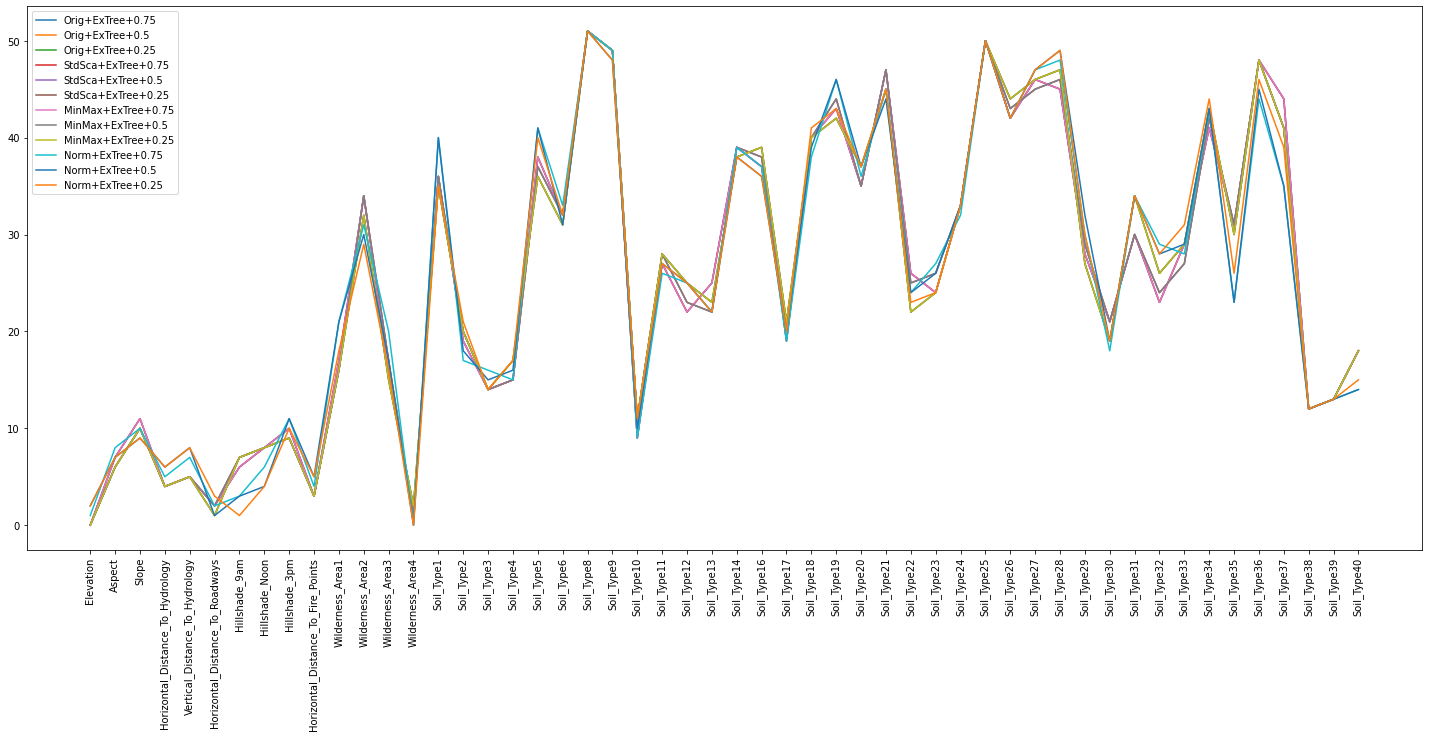

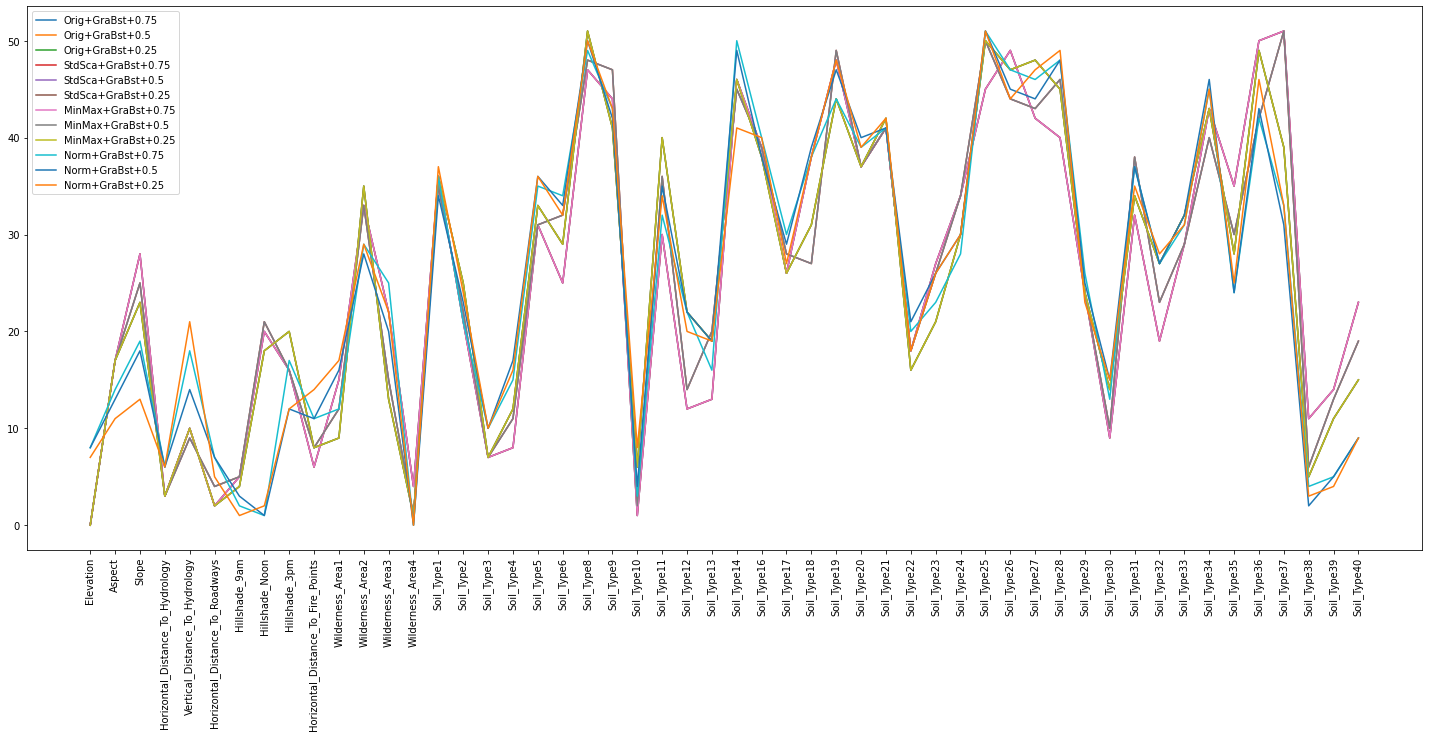

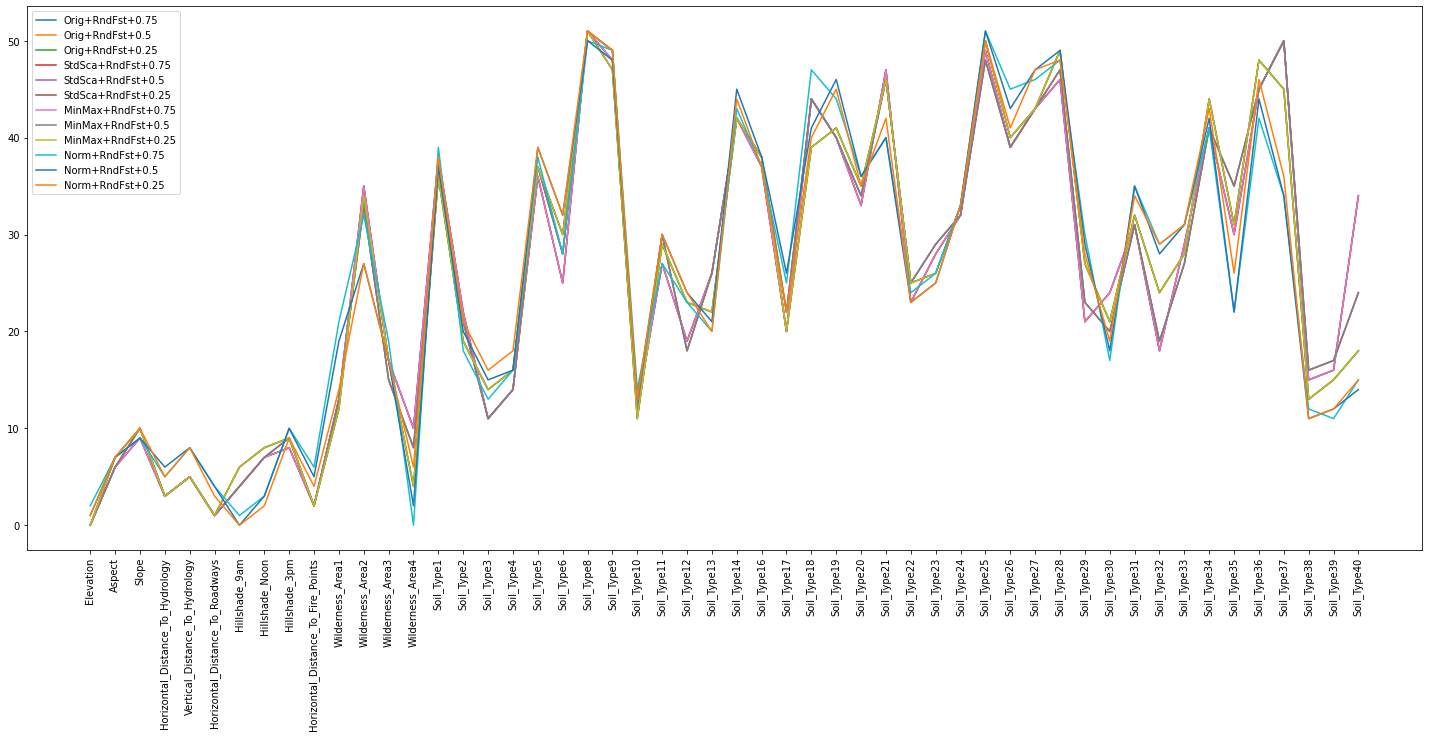

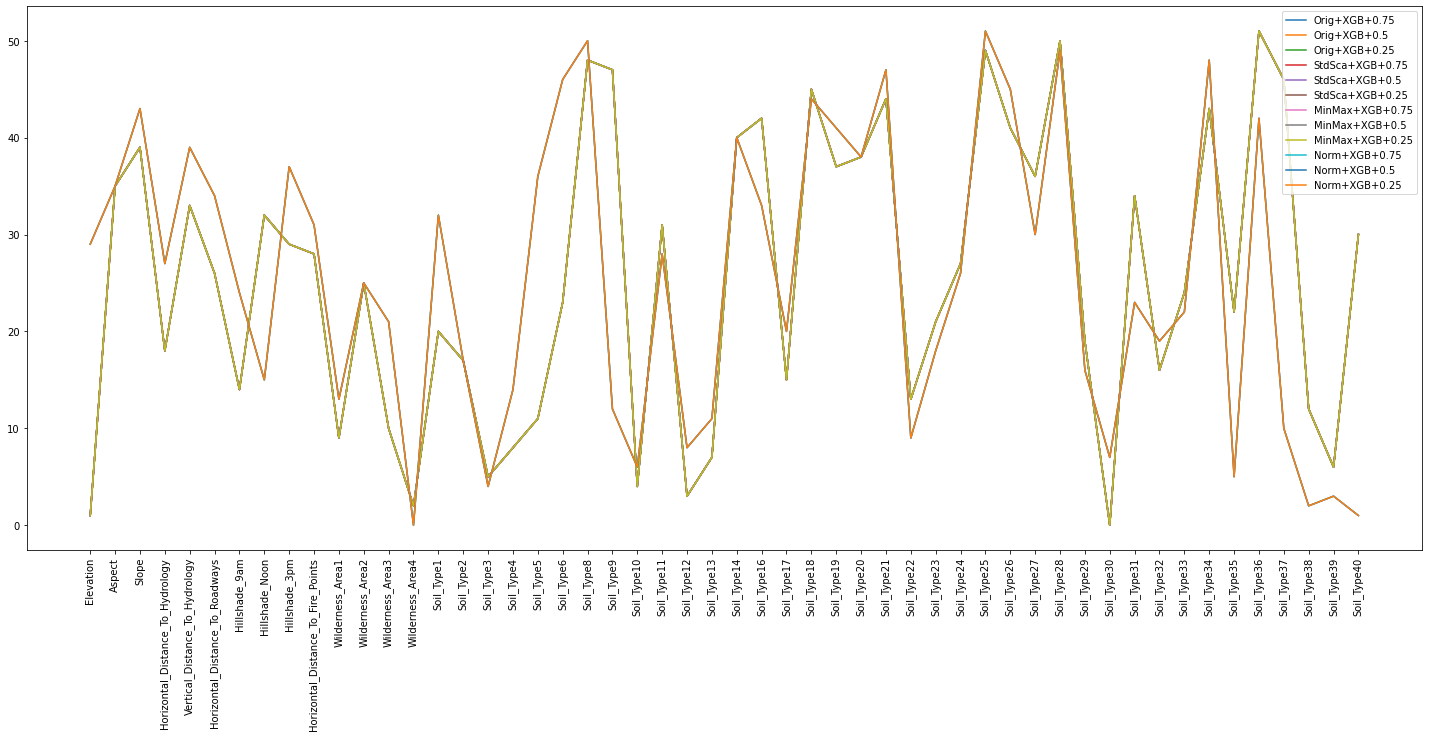

In [98]:
#Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot a graph for different feature selectors        
for f_name in feat_list:
    #Array to store the list of combinations
    leg=[]
    fig, ax = plt.subplots()
    #Plot each combination
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        if(name==f_name):
            plt.plot(rank_list)
            leg.append(trans+"+"+name+"+%s"% v)
    #Set the tick names to names of columns
    ax.set_xticks(range(c-1))
    ax.set_xticklabels(cols[:c-1],rotation='vertical')
    #Display the plot
    plt.legend(leg,loc='best')    
    #Plot the rankings of all the features for all combinations
    plt.show()